# Matplotlib 简介与常用绘图函数语法

链接：https://matplotlib.org/stable/gallery/index.html

## Matplotlib 是什么？有什么用？
- **Python 最常用的可视化库**：适合科研绘图、数据分析、工程报告、论文与课件。
- **优势**：绘图类型全面、可高度定制（字体/刻度/坐标轴/网格/样式/导出），与 **NumPy/Pandas/SciPy** 无缝协作。
- **两种使用风格**：
  - `pyplot`（状态机）：`plt.plot(...)`，上手快；
  - **面向对象（推荐）**：`fig, ax = plt.subplots(); ax.plot(...)`，结构清晰、易控复杂图。

---

## 基本安装与设置
```python
pip install matplotlib
```

把 `Matplotlib` 的绘图后端切到 `“inline”` 模式——把图像以静态位图直接嵌入到输出单元格里显示
```python
%matplotlib inline
```

设置对高清屏幕的支持
```python
%config InlineBackend.figure_format = 'retina'
```

In [61]:
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [62]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### 设置中英文字体

In [64]:
import platform, matplotlib as mpl
from matplotlib.font_manager import FontProperties, findfont

def first_ok(cands):
    for name in cands:
        try:
            findfont(FontProperties(family=name), fallback_to_default=False)
            return name
        except Exception:
            pass
    return None

sys = platform.system()
if sys == "Darwin":   # macOS
    cjk_candidates = ["Songti SC", "Hiragino Sans GB", "STHeiti", "PingFang SC",   ]
elif sys == "Windows":
    cjk_candidates = ["Microsoft YaHei", "SimHei", "NSimSun", "KaiTi"]
else:                 # Linux
    cjk_candidates = ["Noto Sans CJK SC", "Source Han Sans SC", "WenQuanYi Micro Hei", "AR PL UMing CN"]

cjk = first_ok(cjk_candidates)

#（可选）清理字体缓存，改完配置后建议重启 kernel
# import shutil; shutil.rmtree(mpl.get_cachedir(), ignore_errors=True)

mpl.rcParams.update({
    # 关键顺序：STIX（英文/数学） → DejaVu Sans（含 U+2212） → 中文
    "font.family": ["STIXGeneral", "DejaVu Sans"] + ([cjk] if cjk else []),
    "font.sans-serif": ["STIXGeneral", "DejaVu Sans"] + ([cjk] if cjk else []),

    # 数学字体固定用 STIX，防止落到“default”
    "mathtext.fontset": "stix",
    "mathtext.rm": "STIXGeneral",
    "mathtext.it": "STIXGeneral:italic",
    "mathtext.bf": "STIXGeneral:bold",

    "axes.unicode_minus": True,   # 使用 Unicode '−'（由 STIX/DejaVu 提供）
    "text.usetex": False,         # 没有配置 CJK 的 LaTeX 时必须关闭
    'font.size': 16, 
})
print("CJK fallback:", cjk or "未找到；建议安装 Noto Sans CJK / 思源黑体 / 微软雅黑 / 苹方")

CJK fallback: Microsoft YaHei


# Matplotlib 基础

## 状态机风格 vs 面向对象风格
- **状态机（pyplot）**：简洁、快速试验 `plt.plot(...)`
- **面向对象（OO）**：推荐教学/项目使用，`fig, ax = plt.subplots()` 后操作 `ax`


| 功能     | 方法（Axes）                                       | 等价 `pyplot`                      |
| ------ | ---------------------------------------------- | -------------------------------- |
| 折线     | `ax.plot(x, y, ...)`                           | `plt.plot(...)`                  |
| 散点     | `ax.scatter(x, y, ...)`                        | `plt.scatter(...)`               |
| 条形     | `ax.bar(x, h)` / `ax.barh(y, w)`               | `plt.bar` / `plt.barh`           |
| 直方     | `ax.hist(data, bins=...)`                      | `plt.hist(...)`                  |
| 阶梯/填充  | `ax.step(...)` / `ax.fill_between(...)`        | `plt.step` / `plt.fill_between`  |
| 误差条    | `ax.errorbar(...)`                             | `plt.errorbar(...)`              |
| 箱线/小提琴 | `ax.boxplot(...)` / `ax.violinplot(...)`       | `plt.boxplot` / `plt.violinplot` |
| 等高/热力  | `ax.contour/contourf` / `ax.imshow/pcolormesh` | 同名                               |
| 向量/流线  | `ax.quiver(...)` / `ax.streamplot(...)`        | 同名                               |
| 3D     | `ax.plot_surface/plot3D/scatter3D`             | 同名（mplot3d）                      |
| 标题/标签  | `ax.set_title/xlabel/ylabel`                   | `plt.title/xlabel/ylabel`        |
| 图例/网格  | `ax.legend()` / `ax.grid(True)`                | `plt.legend/grid`                |
| 坐标缩放   | `ax.set_xscale('log')`                         | 同名                               |
| 保存     | `fig.savefig(...)`                             | `plt.savefig(...)`               |


## 折线图（Line）
- 调用形式：
```python
ax.plot(x, y, 
        color=..., ## 可选项， `color`：颜色（名称、十六进制或调色板序号）。  
        linestyle=..., ## 可选项， `linestyle`：线型（`'-'`、`'--'`、`':'` 等）
        linewidth=..., ## 可选项，数字，表示线的粗细
        marker=..., ## `marker`：点标记（`'o'`、`'s'`、`'^'` 等）
        label=... ## 线的标签，在 图例中显示
       )
```
- 要点：  
  - 支持多条曲线叠加；配合 `ax.legend()` 出图例。
  - 支持 `ax.grid()` 显示辅助线

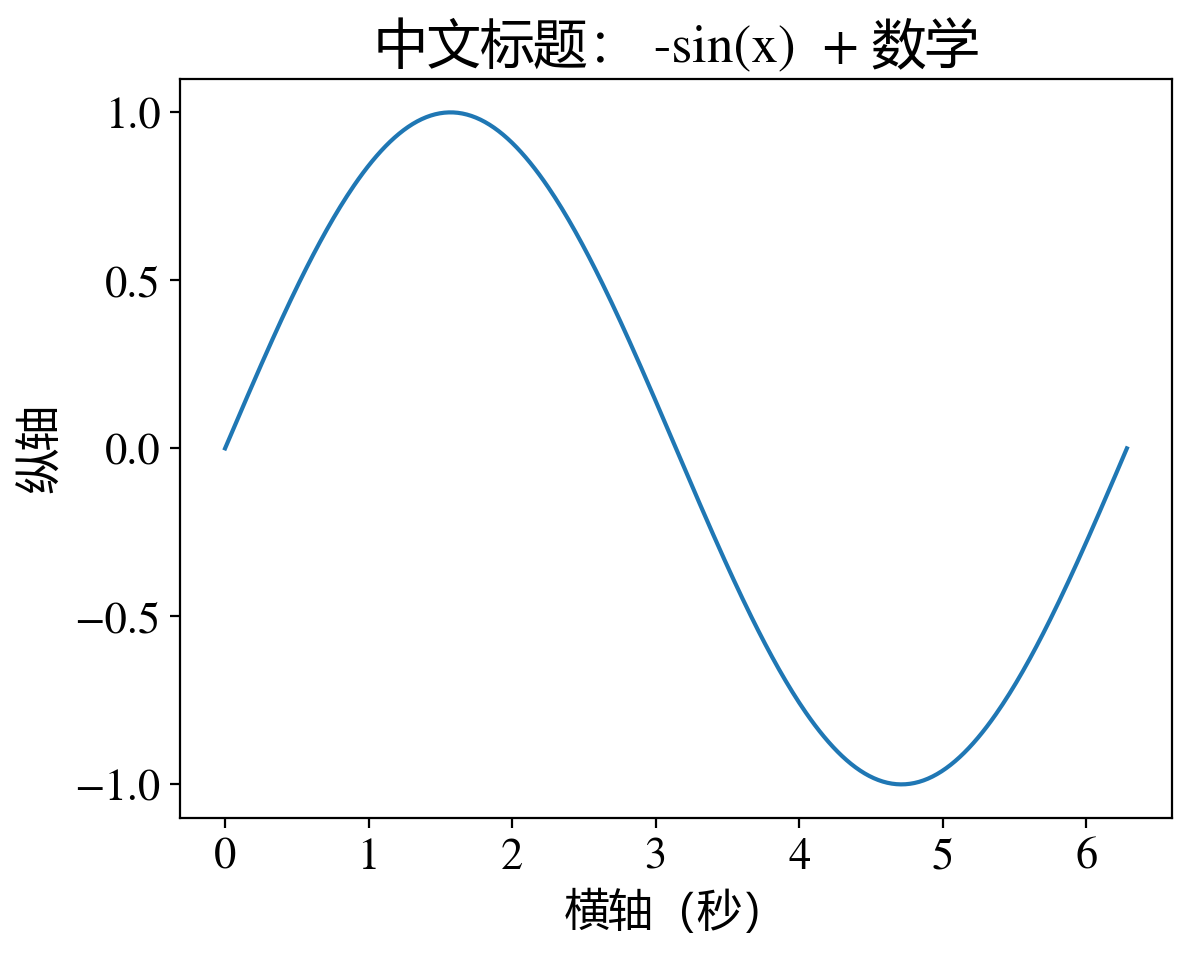

In [68]:
# --- 自检：同时包含中文与数学 ---
x = np.linspace(0, 2*np.pi, 400)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.set_title( "中文标题： -sin(x)  + 数学" )
ax.set_xlabel("横轴（秒）")
ax.set_ylabel("纵轴")
plt.show()

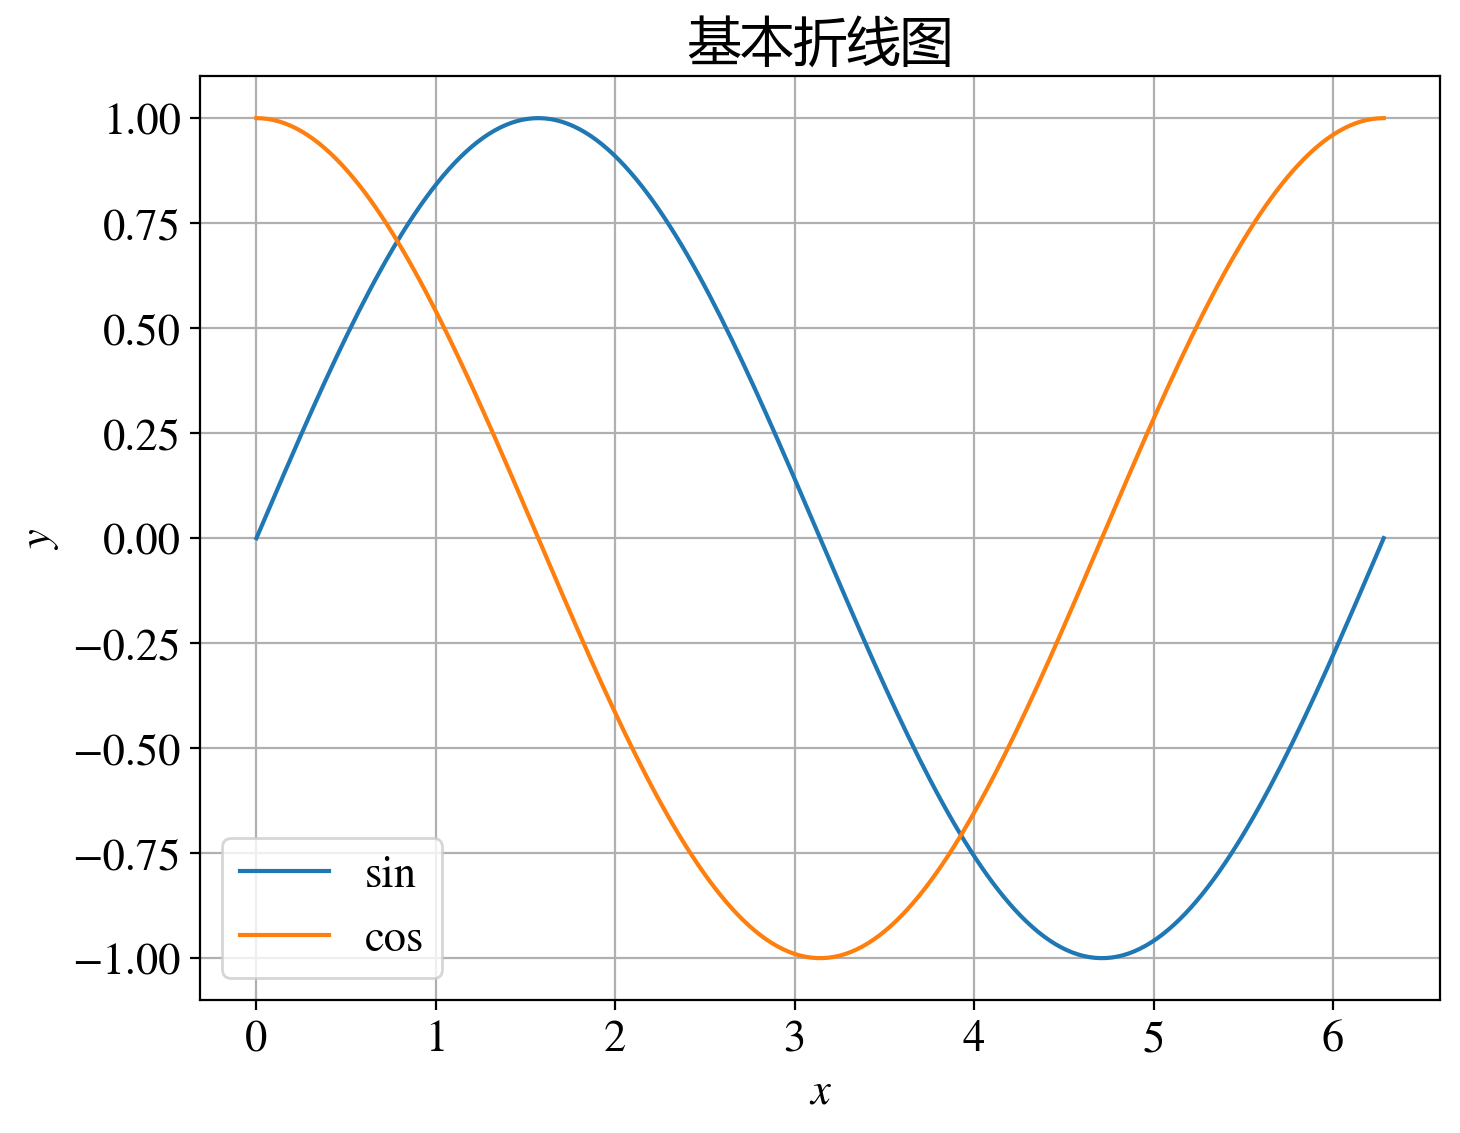

In [69]:
fig, ax = plt.subplots(figsize=(8, 6))
x = np.linspace(0, 2*np.pi, 200)

plt.plot(x, np.sin(x), label='sin')
plt.plot(x, np.cos(x), label='cos')

## 加标题，（可选项）
plt.title("基本折线图")

## x轴标签
plt.xlabel("$x$")

## y轴标签
plt.ylabel("$y$")

## 画图例
plt.legend()

## 画格线
plt.grid(True)

#plt.show()


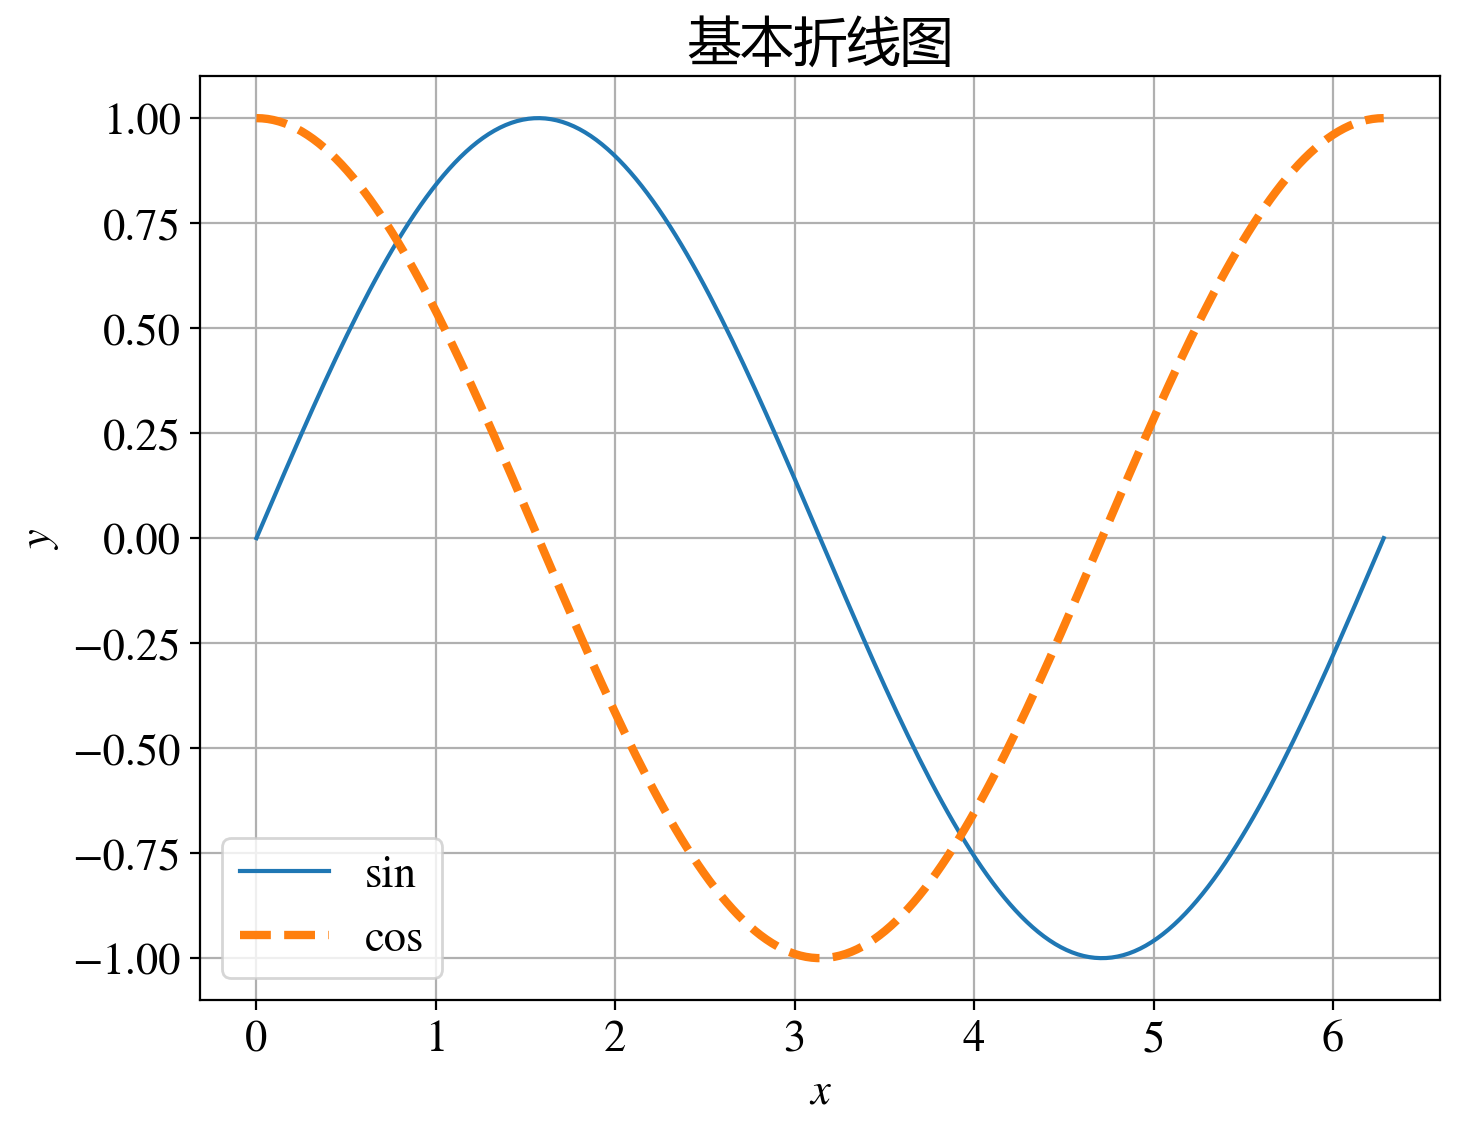

In [70]:
# 面向对象风格（推荐）
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, np.sin(x), label='sin')
ax.plot(x, np.cos(x), 
        linestyle='dashed',  ## 线的形式，可以是 实线：‘solid’, 虚线：'dashed', 点线：'dotted", 点虚线：‘dashdot’
        linewidth = 3, ## 线的粗细程度
        label='cos')

ax.set_title("基本折线图")

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.legend(loc='best' ) ## loc: 'best', 'upper left', 'lower right'

ax.grid(True)
#plt.show()


### 课堂练习
1. 生成 `y = e^{-x/2} sin(3x)` 的曲线，设置标题/标签/网格；给出 `x∈[0,10]`。  

用虚线，并画出图例

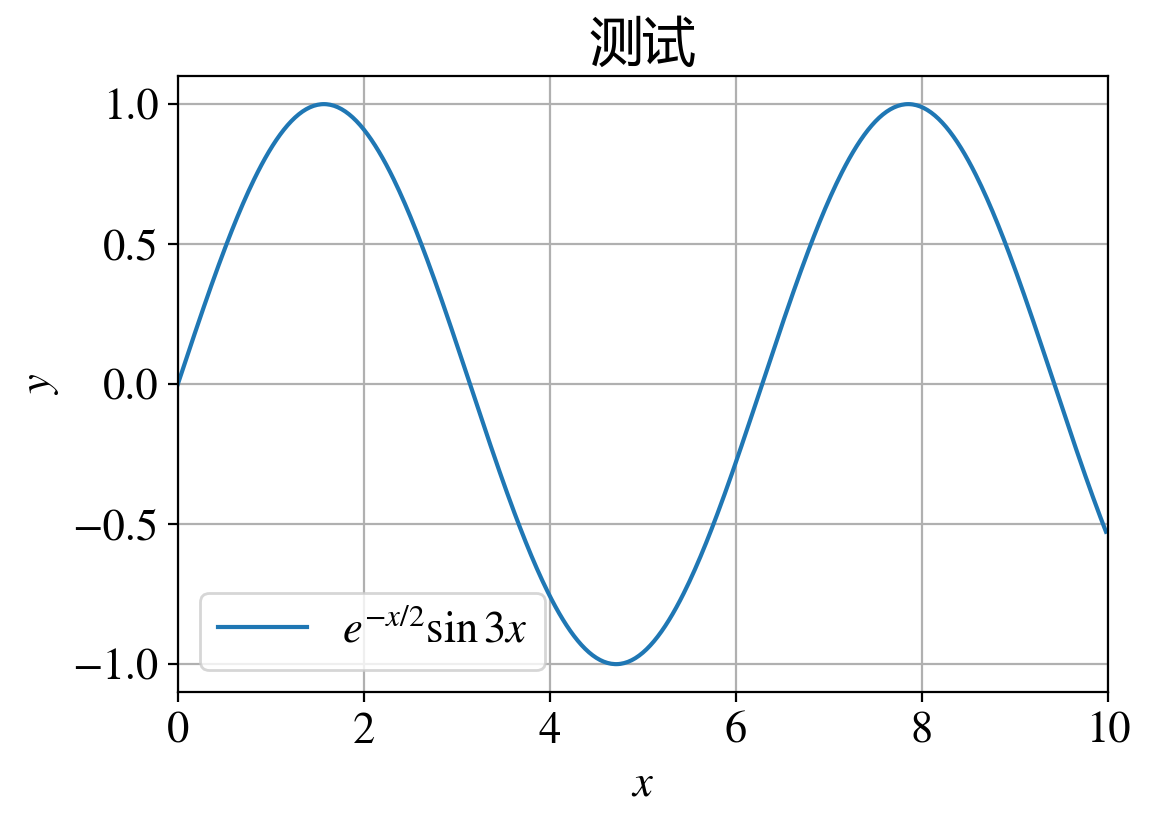

In [72]:
## 你的代码 1

x = np.arange(0, 10, 0.02 )
y = np.exp(-x/2) * np.sin(3*x)

fig, ax = plt.subplots(figsize=(6,4))

## 你的代码

ax.plot(x, np.sin(x), label=r'$e^{-x/2} \sin 3x$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_title("测试")
ax.legend()

ax.set_xlim(0, 10)
ax.grid()


---
## 散点图（Scatter）
- 调用形式：
```python
ax.scatter(x, y, 
           s=..., ## `s`：点大小
           c=..., ## `c`：单色或按数组映射颜色
           cmap=..., ## `cmap`：颜色映射表
           alpha=..., ## `alpha`：透明度
           marker=... ## `marker`：点标记（`'o'`、`'s'`、`'^'` 等）
          )
```

colormap 选项： https://matplotlib.org/stable/users/explain/colors/colormaps.html

- 要点：  
  - 适合展示离散观测与二维数据云。

In [74]:
#np.random.rand?

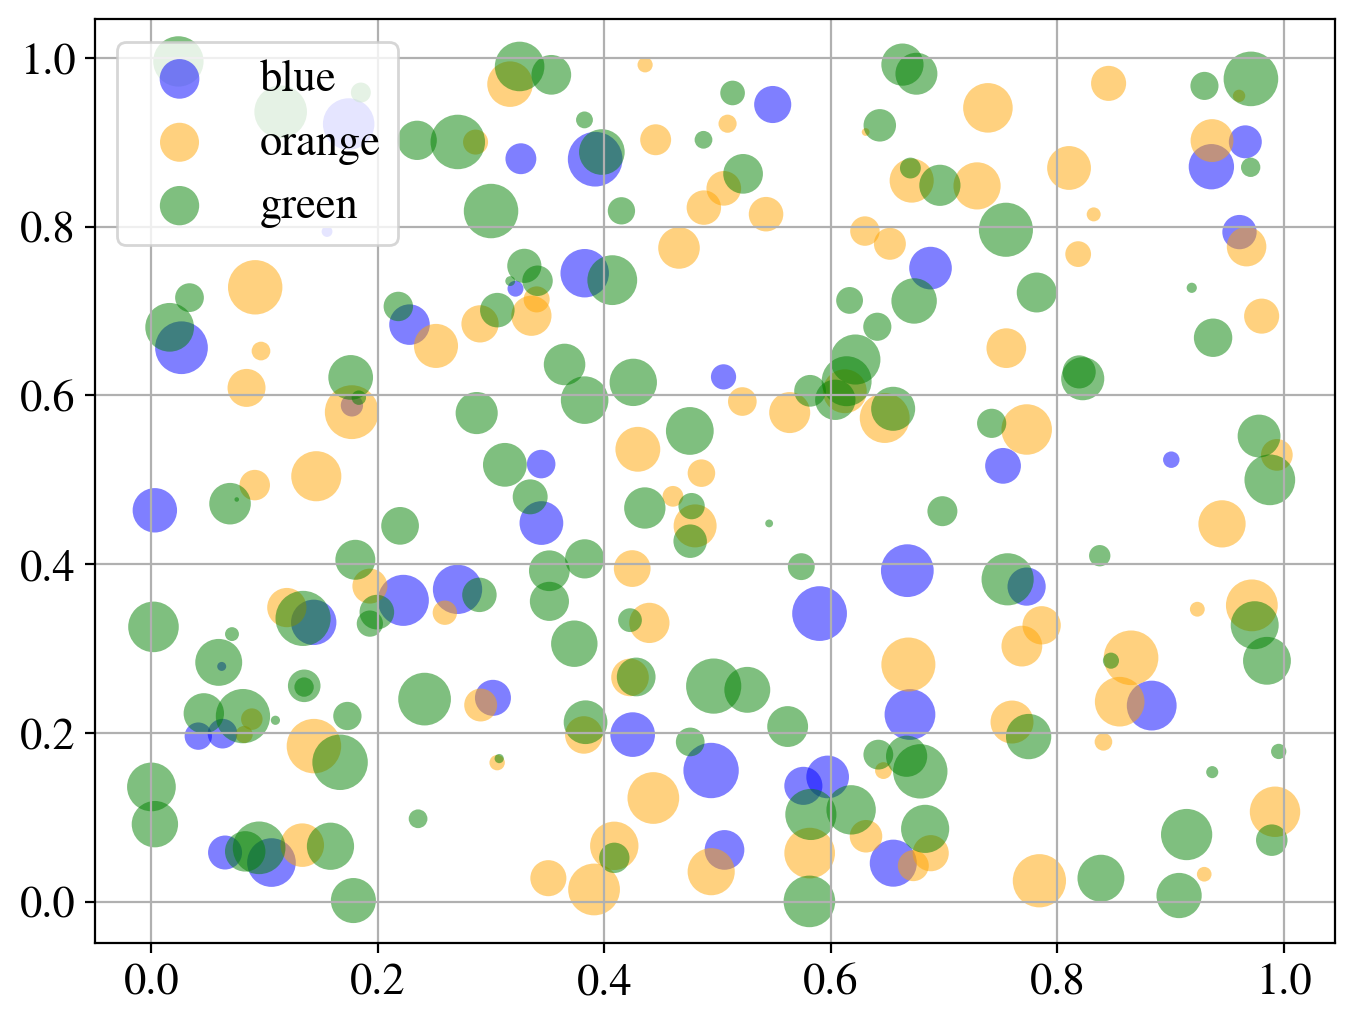

In [75]:
np.random.seed(20251010)

fig, ax = plt.subplots(figsize=(8, 6))

for _idx, color in enumerate(['blue', 'orange', 'green']):
    n = 40 * (_idx +1)
    x, y = np.random.rand(2, n)
    scale = 400.0 * np.random.rand(n)
    ax.scatter(x, y, 
               c=color, 
               s=scale, 
               label=color,
               alpha=0.5, 
               edgecolors='none')

ax.legend()
ax.grid(True)


In [76]:
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, high,
# low, close, volume, adj_close from the mpl-data/sample_data directory. The
# record array stores the date as an np.datetime64 with a day unit ('D') in
# the date column.
price_data = cbook.get_sample_data('goog.npz')['price_data']
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data["adj_close"]) / price_data["adj_close"][:-1]

# Marker size in units of points^2
volume = (15 * price_data["volume"][:-2] / price_data["volume"][0])**2
close = 0.003 * price_data["close"][:-2] / 0.003 * price_data["open"][:-2]

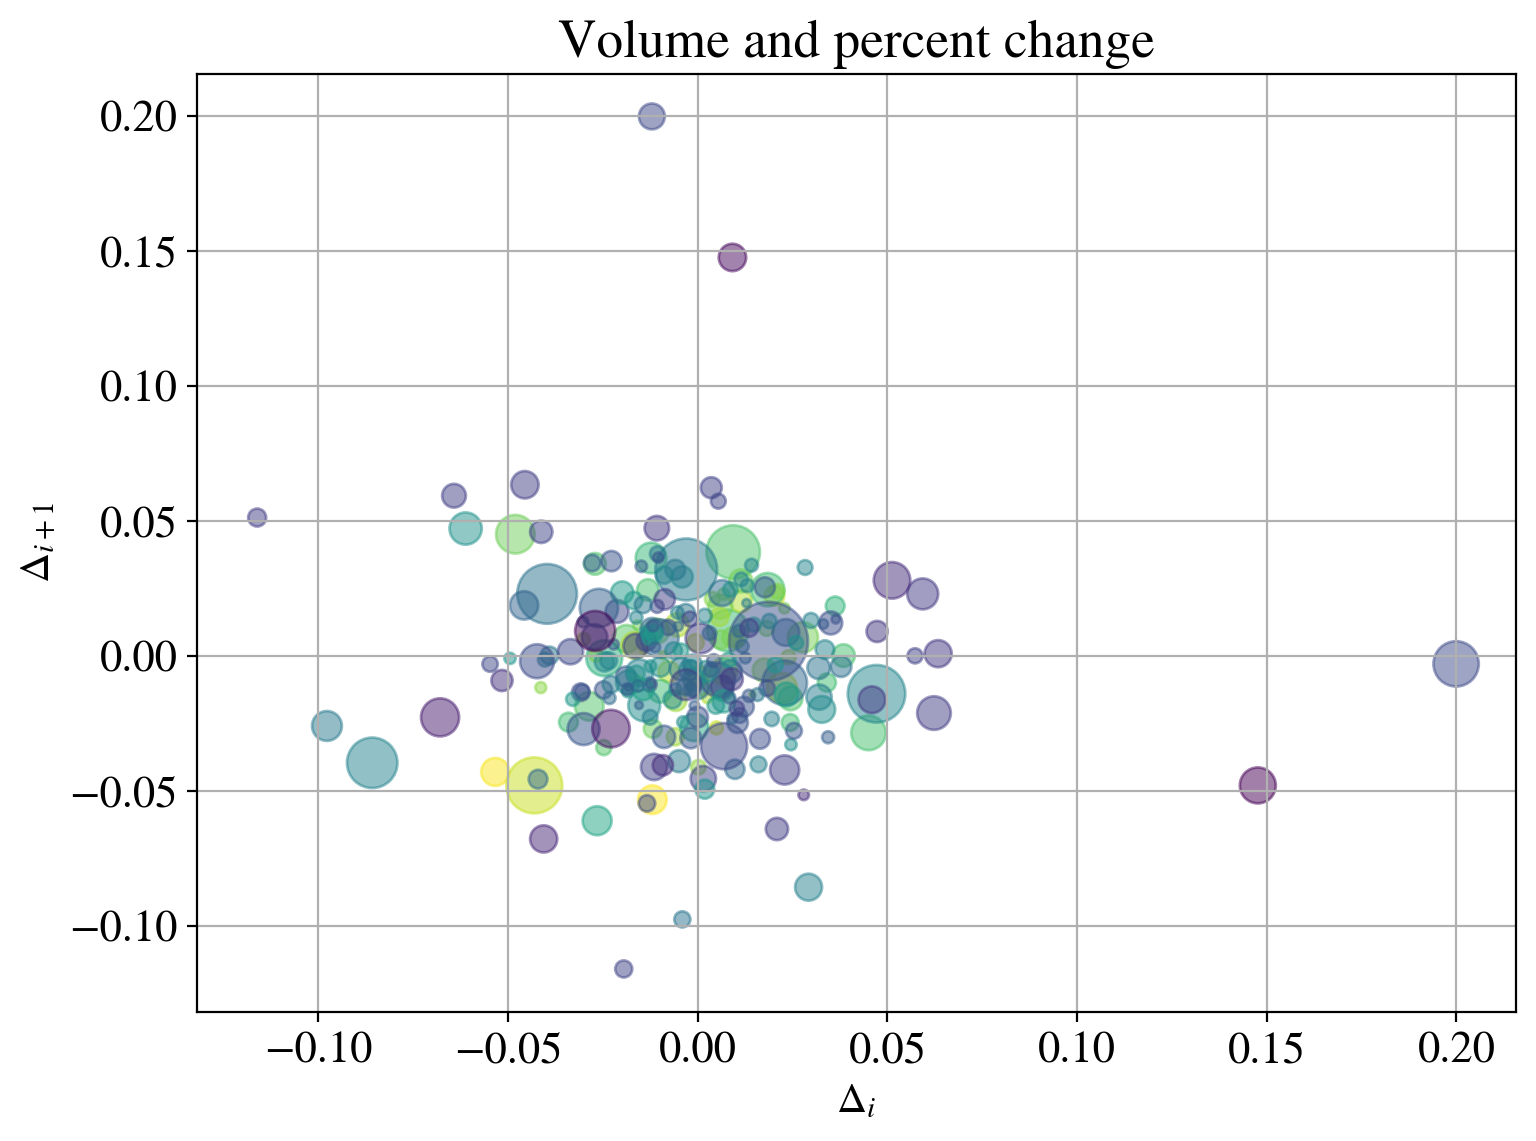

In [77]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha = 0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)

fig.tight_layout()


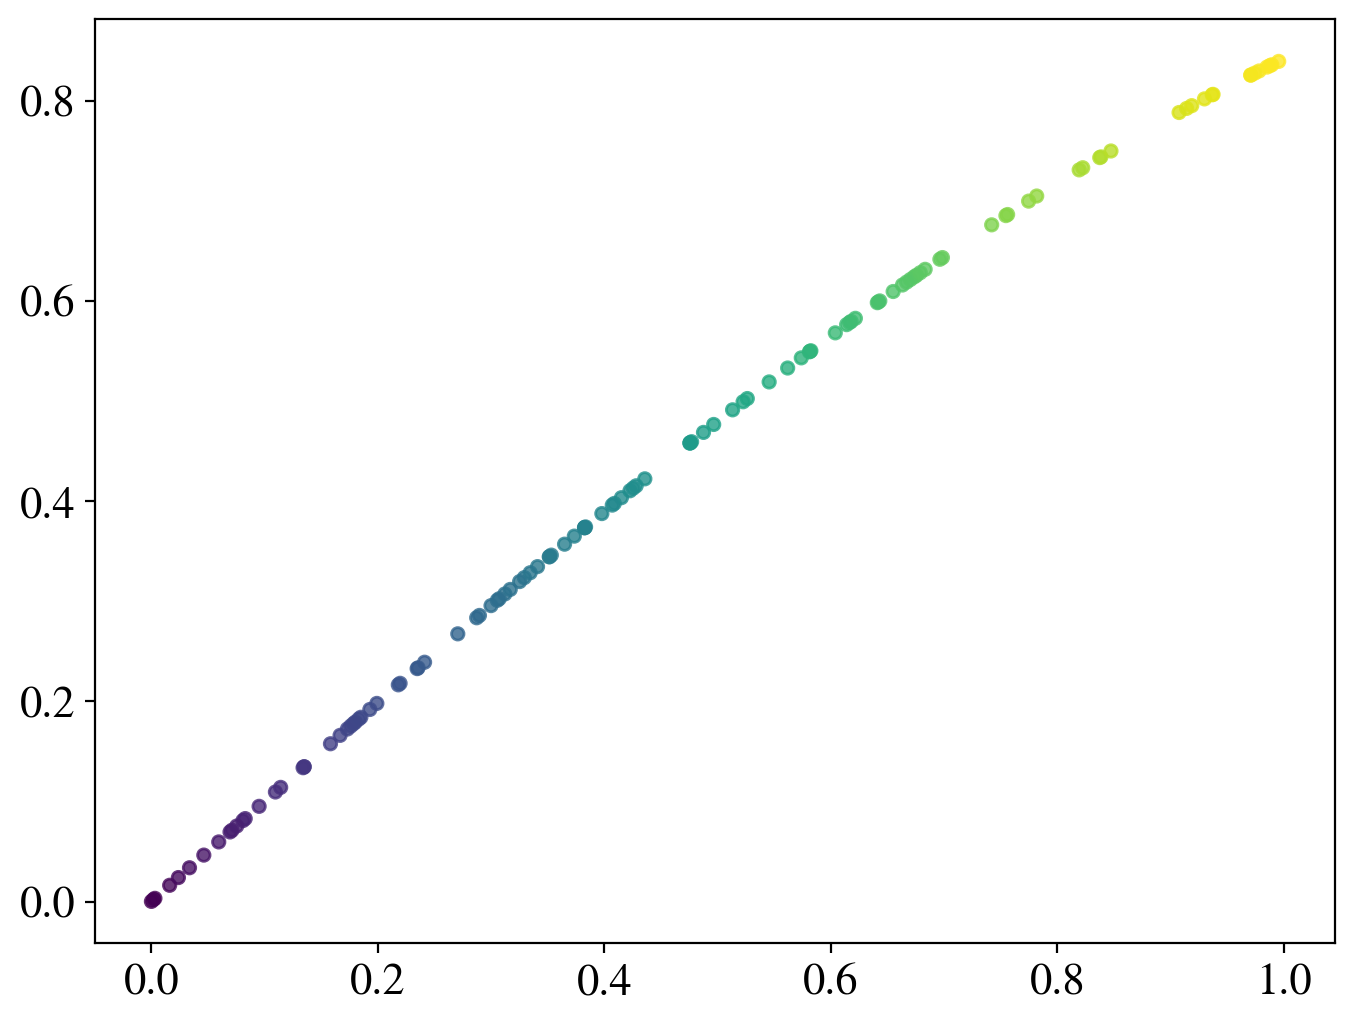

In [78]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(x, np.sin(x), 
           s=20, 
           c=np.sin(x), 
           cmap='viridis', alpha=0.8
          )


In [79]:
#ax.bar?

## 条形图（Bar/Barh）
- 调用形式：  
  - 竖直条：`ax.bar(x, height, width=..., align=..., color=...)`  
  - 水平条：`ax.barh(y, width, height=..., align=..., color=...)`
- 要点：  
  - `x`/`y` 对应分类或位置；`height/width` 为数值高度/宽度；  
  - 可配合误差条呈现均值±标准误。

Text(0, 0.5, '数值')

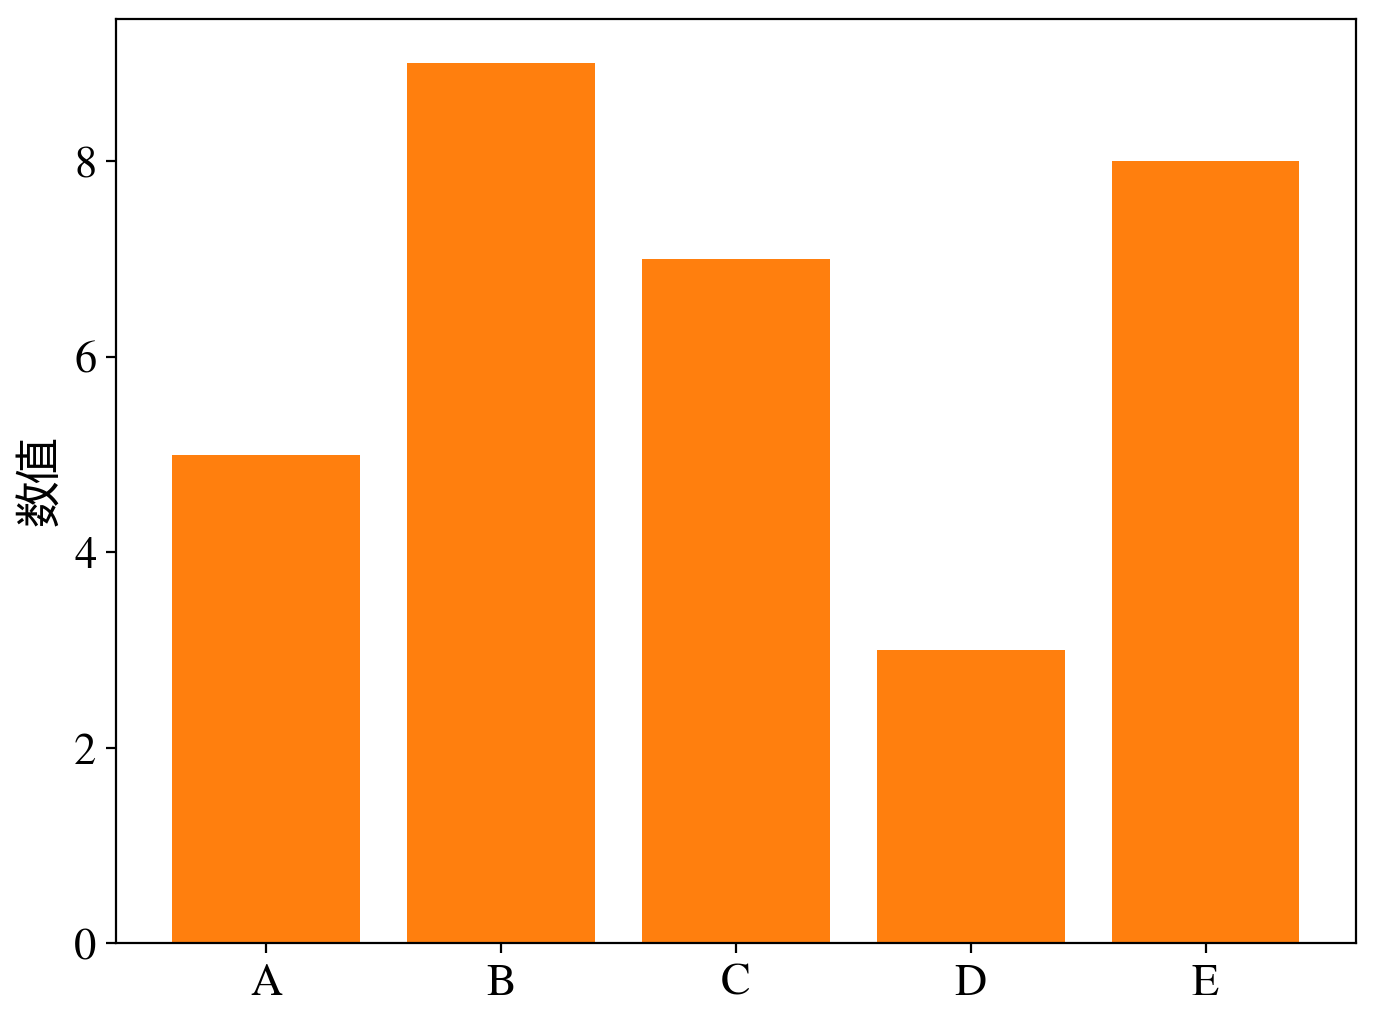

In [81]:

cats = ['A','B','C', 'D', 'E' ]; vals = [5, 9, 7, 3, 8]

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(cats, vals, color='C1')
ax.set_ylabel('数值')


Text(0.5, 0, '数值')

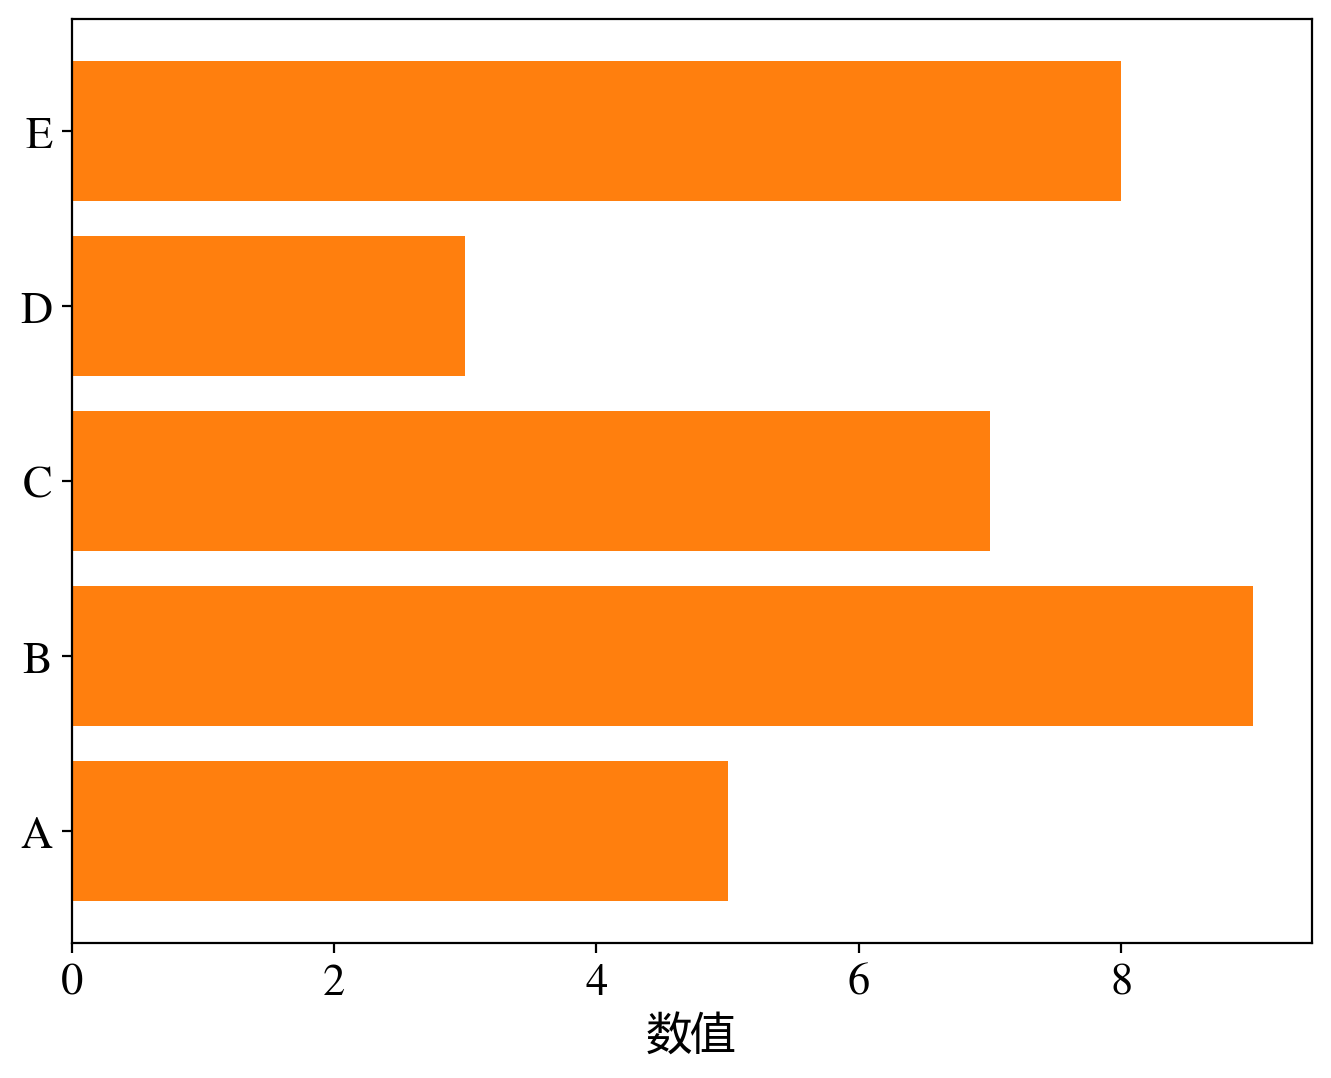

In [82]:

fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(cats, vals, color='C1')

ax.set_xlabel('数值')


Text(0, 0.5, '业绩')

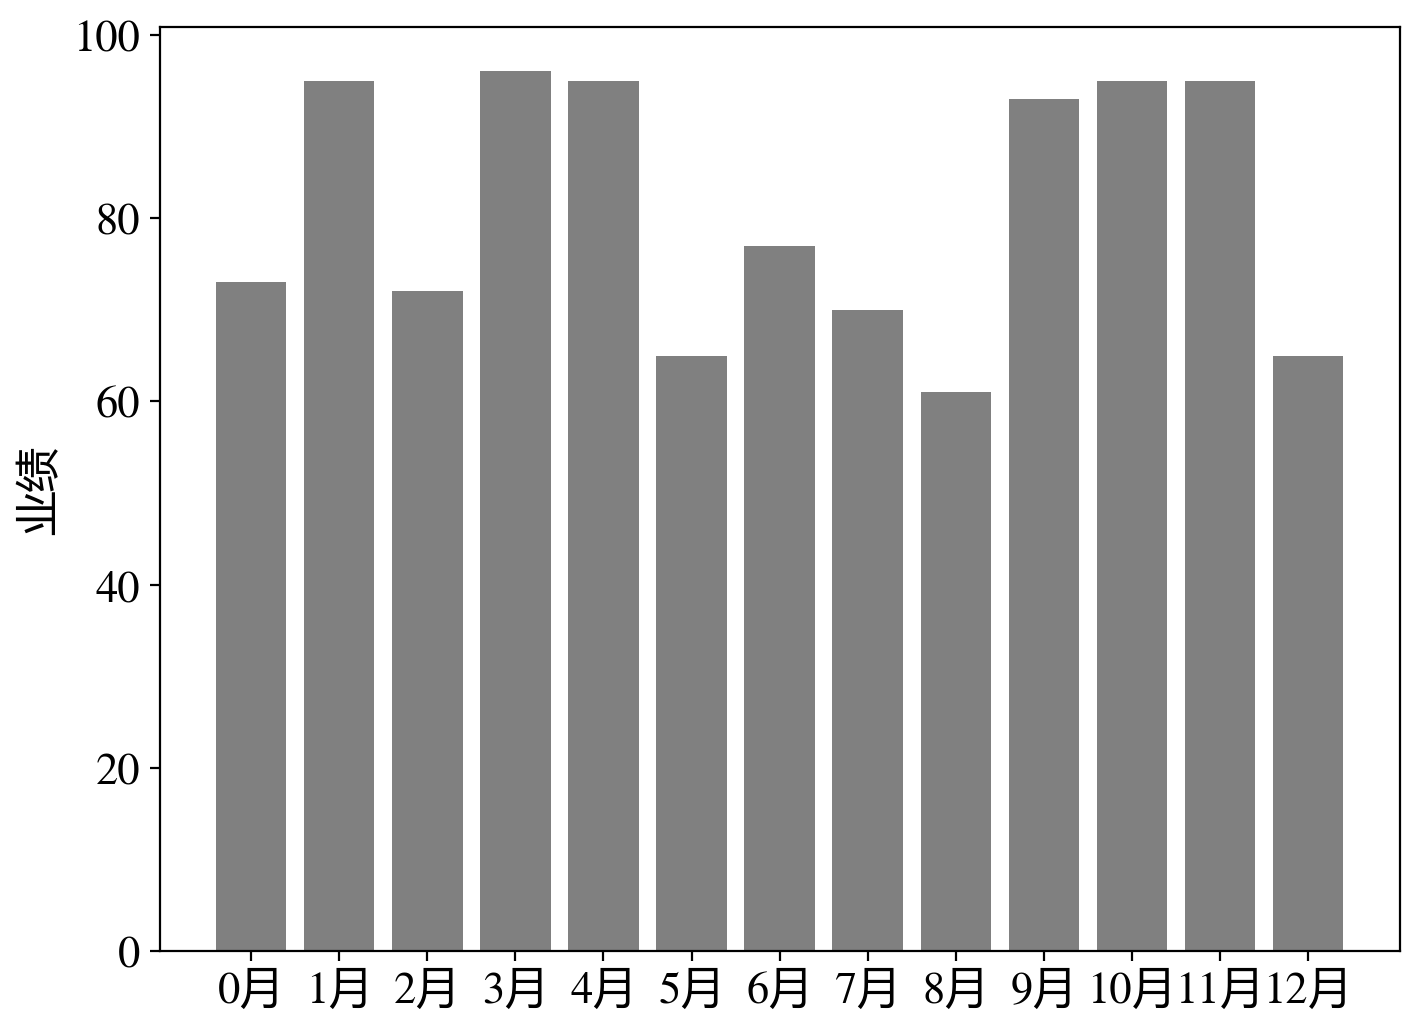

In [83]:
## 课堂练习

months = []
for _k in range(13):
    months.append(f'{_k}月')

values = np.random.randint(60, 100, len(months) )

## 用柱状图画出12个月的柱状图，颜色用 grey，纵轴为“业绩”。

## 你的代码

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(months, values, color='grey')
ax.set_ylabel('业绩')

## 直方图（Histogram）
- 调用形式：
```python
ax.hist(data, 
        bins=..., 
        range=..., 
        density=..., 
        alpha=...
       )
```
关键参数
1) bins —— 直方图的“箱数/边界”
    - 定义直方图的分箱方式，影响形状与解读的稳定性。
    - 整数：例如 bins=30，表示把数据按范围均分为 30 个箱。
    - 序列：例如 bins=[0, 10, 20, 50, 100]，使用自定义边界（非均匀箱宽）。
    - 字符串规则（Matplotlib 会调用 NumPy 的策略自动估计箱数）：
        - 'auto'（默认）：综合 Freedman–Diaconis 与 Sturges 等规则，常用、稳妥。
        - 'fd'（Freedman–Diaconis）：对含离群点更稳健，适合连续分布。
        - 'sturges'：倾向较少箱，适合近似正态且样本不大。
        - 'doane'、'scott'、'rice'、'sqrt' 等也可用。
    - 建议：先用 bins='auto'/'fd' 观察，再根据数据分布与讲解需求微调；需要“对齐”某些阈值时用自定义边界。

2) range —— 统计的数值范围
    - 形式：range=(xmin, xmax)，只统计落在此区间的数据；区间外数据忽略。
    - 与 bins 一起决定箱宽：
    - 若 bins 为整数且设置了 range，箱宽 = (xmax-xmin)/bins。
    - 若 bins 是边界序列，则忽略 range。
    - 用途：排除极端离群；对比不同数据集时强制相同范围/箱边界，以便公平比较。

3) density —— 计数 vs 概率密度
    - density=False（默认）：n 是计数（每个箱里的样本数），柱子面积不是 1。
    - density=True：n 是概率密度，使得柱子面积之和 ≈ 1（严格地说，密度 * 箱宽 的和 ≈ 1）。
    - 适合：不同样本量的直方图对比形状；与 PDF/KDE 叠加比较。
    - 注意：density=True 时，y 轴高度不是“数目”，而是“密度（每单位 x 的概率）”。
4) alpha —— 透明度
    - 取值范围：0 ~ 1，越小越透明。
    - 叠加多个直方图时，调低 alpha 便于观察重叠区域（如 alpha=0.6）

5) cumulative -- 累积直方图
    - 取`True` or `False`


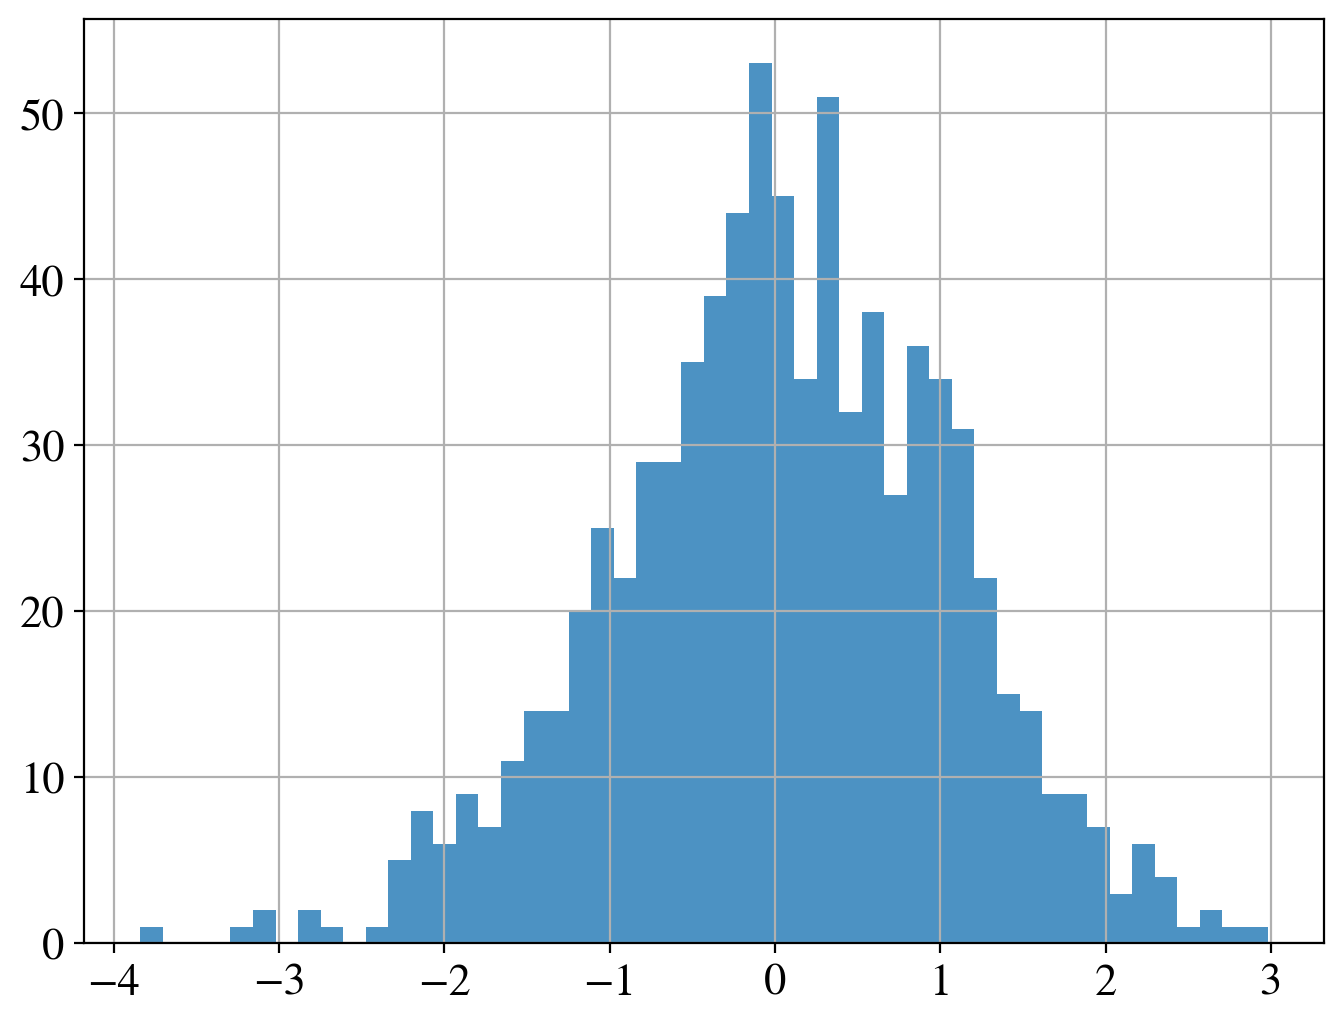

In [85]:
fig, ax = plt.subplots(figsize=(8, 6))

data = np.random.normal(0, 1, 800)
ax.hist(data, 
        bins=50, 
        alpha=0.8)

ax.grid()

Text(0.5, 1.0, 'Density Histogram in [-3, 3]')

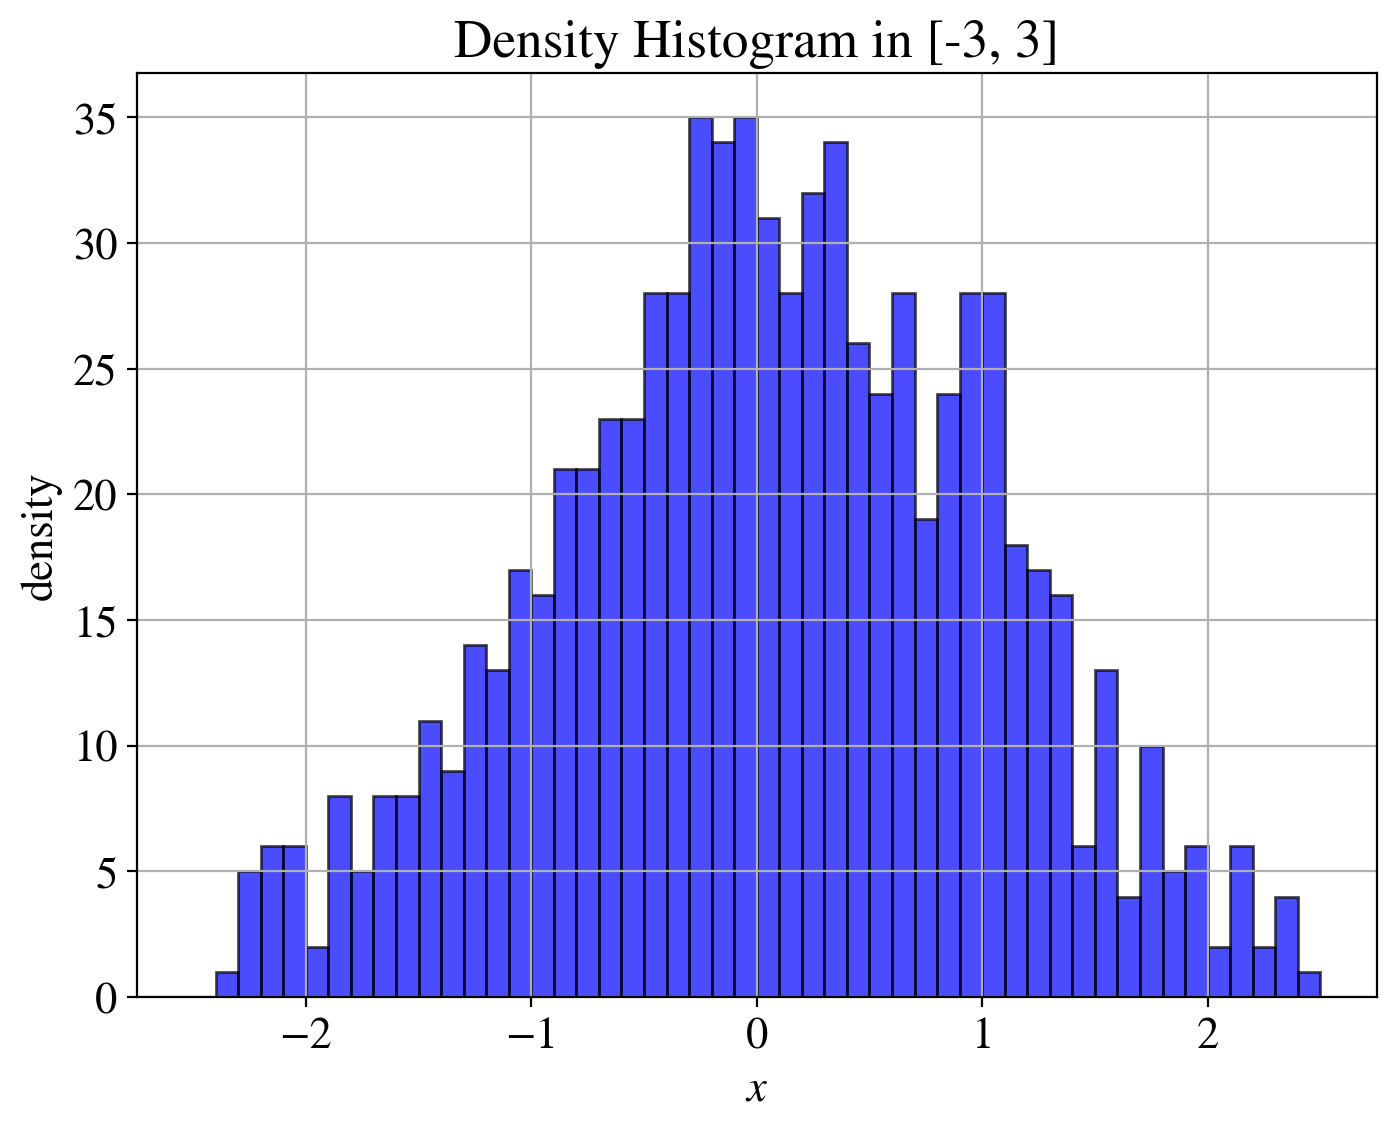

In [86]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(data, bins=50, 
        range=(-2.5, 2.5), 
        #density=True, 
        alpha=0.7, 
        color='blue', 
        edgecolor='k'
       )

ax.grid()
ax.set_xlabel('$x$')
ax.set_ylabel('density')
ax.set_title('Density Histogram in [-3, 3]')


Text(0.5, 1.0, 'Two Distributions (same bins)')

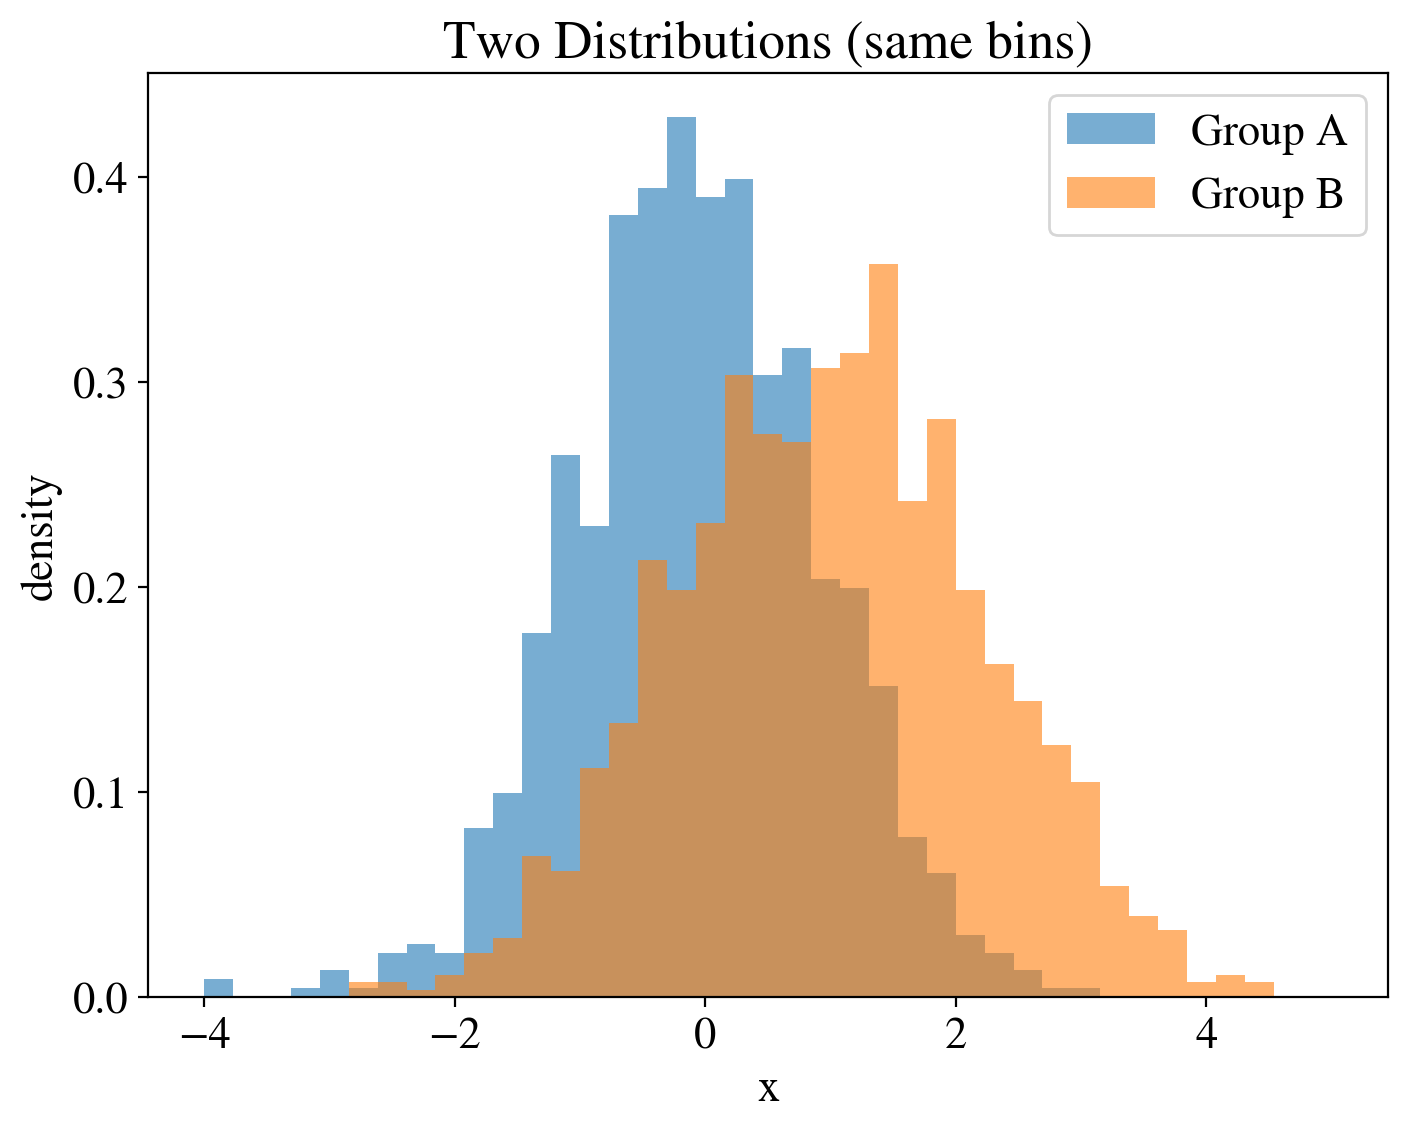

In [87]:
rng = np.random.default_rng(0)
data = rng.normal(loc=0, scale=1, size=1000)
data2 = rng.normal(loc=1.0, scale=1.2, size=1200)

fig, ax = plt.subplots(figsize=(8, 6))
# 固定相同的 bins（边界）以确保公平比较
bins = np.linspace(-4, 5, 40)

ax.hist(data,  bins=bins, density=True, alpha=0.6, label='Group A')
ax.hist(data2, bins=bins, density=True, alpha=0.6, label='Group B')

ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('density')
ax.set_title('Two Distributions (same bins)')


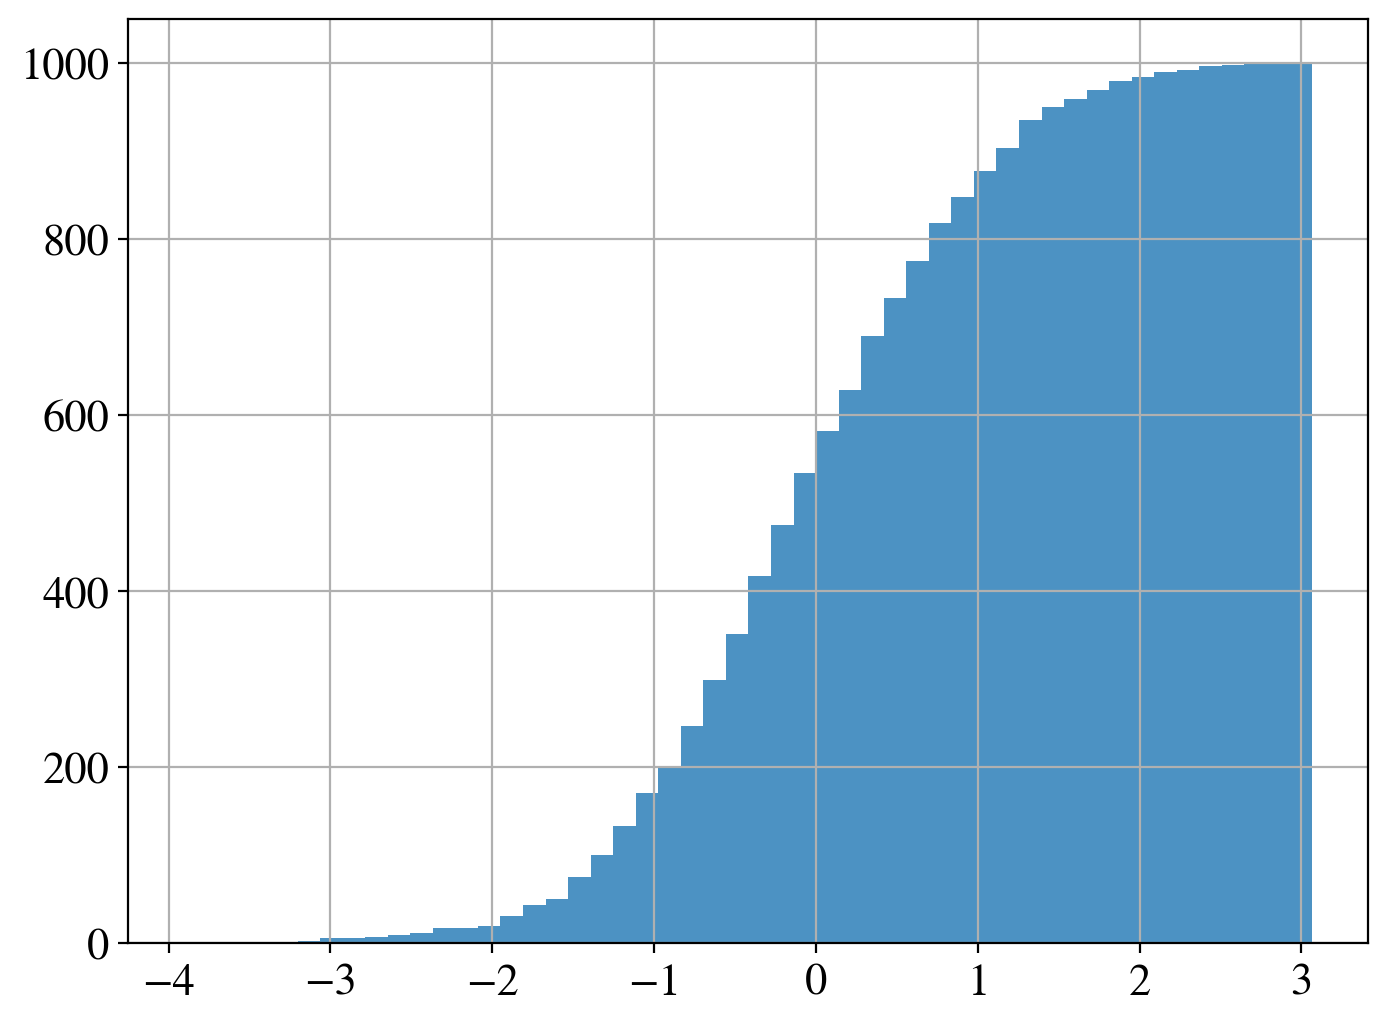

In [88]:
fig, ax = plt.subplots(figsize=(8, 6))

#data = np.random.normal(0, 1, 800)
#ax.hist(data, bins=50, alpha=0.8)
ax.hist(data, bins=50, alpha=0.8, cumulative=True)

ax.grid()

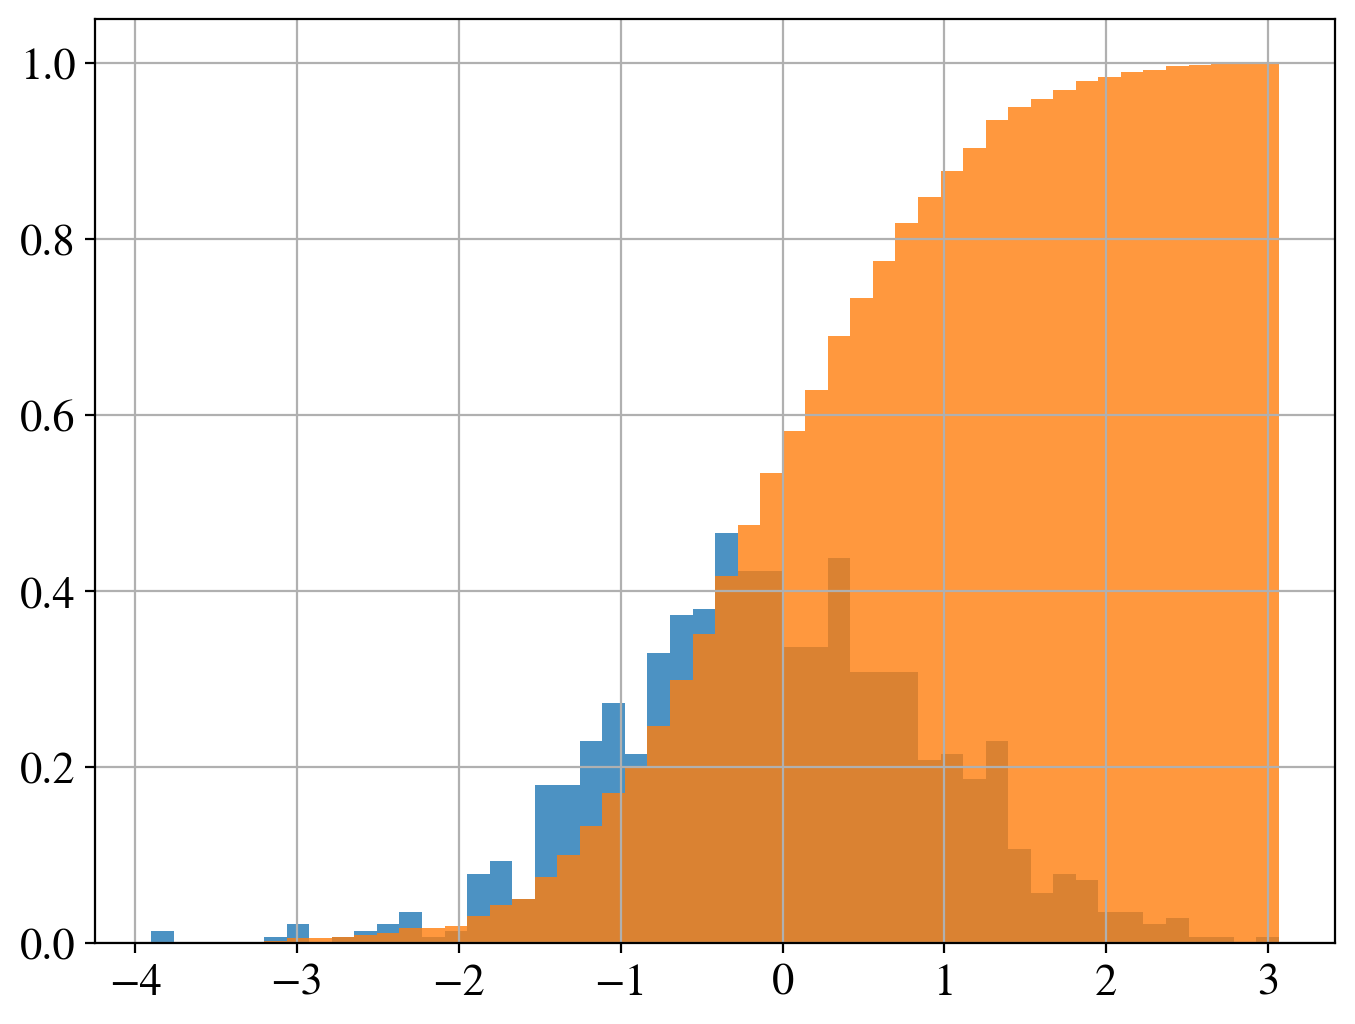

In [89]:
fig, ax = plt.subplots(figsize=(8, 6))

#data = np.random.normal(0, 1, 800)
ax.hist(data, bins=50, density=True, alpha=0.8)
ax.hist(data, bins=50, density=True, alpha=0.8, cumulative=True)

ax.grid()

### 课堂练习

画给定分数的直方图，分析这些分数中有分数的中位数，超过80分以上的有多少比例？


AttributeError: 'Axes' object has no attribute 'hline'

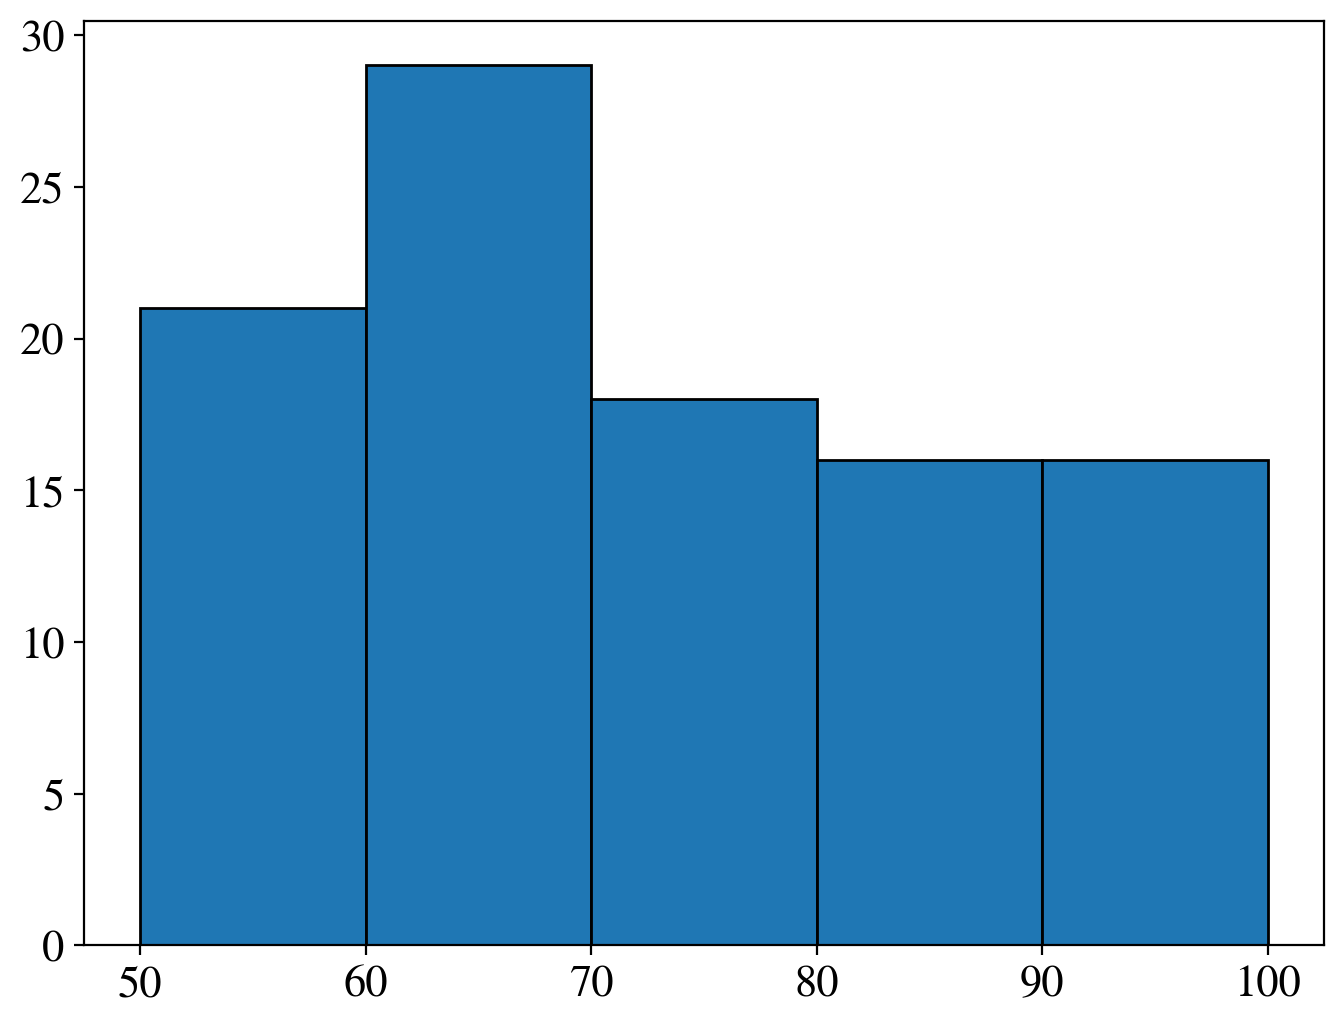

In [91]:
## 100 个分数
scores = np.random.randint(50, 100, 100)

fig, ax = plt.subplots(figsize=(8, 6))

## 你的代码
ax.hist(scores, bins=range(50, 101, 10), edgecolor='black') 
ax.hline()

median = np.median(scores)
ax.annotate(
    f'中位数: {median:.1f}', 
    xy=(median, 0),         
    xytext=(median, 15),      
    arrowprops=dict(facecolor='red', shrink=0.05)  
)


count_above_80 = np.sum(scores > 80)
ratio_above_80 = count_above_80 / len(scores)
ax.text(
    85, 20,  
    f'80+比例: {ratio_above_80:.1%}'
)


print(f"分数的中位数为: {median}")
print(f"超过80分的比例为: {ratio_above_80:.2%}")

plt.show()


## 误差条（Errorbar）
用于在二维坐标上绘制带**误差棒（error bars）**的数据点。常见于实验测量（平均值 ± 标准差 / 标准误）或拟合结果的不确定度可视化。

- 调用形式：`ax.errorbar(x, y, yerr=..., xerr=..., fmt=..., capsize=...)`
核心参数说明

| 参数 | 类型 / 典型取值 | 说明 |
|---|---|---|
| `x`, `y` | 1D 数组/列表 | 数据点的横纵坐标。长度应一致。 |
| `yerr` | 标量、1D、2×N、形如 `(lower, upper)` | 纵向误差棒长度。<br>• 若为标量：每个点同一误差；<br>• 若为 1D：每个点一个误差，默认对称；<br>• 若为 2×N 或 `(lower, upper)`：非对称误差（下/上界不同）。 |
| `xerr` | 同 `yerr` | 横向误差棒长度，规则同上。 |
| `fmt` | 字符串，如 `'o'`, `'s--'`, `'.'` | “**标记+线型**”快捷格式：<br>• 标记：`'o'` 圆点、`'s'` 方块、`'^'` 三角、`'.'` 小点…<br>• 线型：`'-'`, `'--'`, `'-.'`, `':'`；<br>• 颜色：`'r'`, `'g'`, `'b'` 等（或 `color=` 单独传）。 |
| `capsize` | 浮点 | 误差棒**端帽**的大小（像素单位）。`0` 表示无端帽。 |
| `elinewidth` | 浮点 | 误差棒线宽。 |
| `ecolor` | 颜色 | 误差棒颜色。可与点线颜色不同。 |
| `barsabove` | `True/False` | 误差棒是否绘制在点/线**之上**（默认 False，在线下面）。 |
| `lolims`/`uplims` | 布尔数组/布尔 | 仅绘制下/上限（用“箭头帽”指示“只给出上/下界”）。与 `yerr` 联合使用。 |
| `xlolims`/`xuplims` | 布尔数组/布尔 | `x` 方向的“仅下/上限”控制。 |
| `label` | 字符串 | 用于图例的名称。 |
| 其他常用 | `color`, `markersize`, `markerfacecolor`, `markeredgecolor`, `linewidth` | 点、线、误差棒的常规样式控制。 |

> **非对称误差**：`yerr=np.vstack([y_low, y_up])` 或 `yerr=(y_low, y_up)`；同理 `xerr`。


In [ ]:

x = np.arange(1, 6)
y = np.array([2.0, 2.5, 3.2, 3.0, 4.1])
yerr = np.array([0.2, 0.3, 0.15, 0.25, 0.2])

fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(x, y, 
            yerr=yerr, 
            fmt='o-', 
            capsize=4, 
            ecolor='tab:blue', 
            elinewidth=1.2
           )

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('误差棒基础示例')

ax.grid(True, ls='--', alpha=0.3)

In [ ]:
yerr_lower = np.array([0.2, 0.1, 0.15, 0.05, 0.2])
yerr_upper = np.array([0.3, 0.25, 0.3, 0.2, 0.35])

fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(x, y, 
            yerr=(yerr_lower, yerr_upper), 
            fmt='s--', 
            capsize=5, 
            ecolor='tab:red')

ax.set_title('非对称 y 误差')
plt.show()


### 课堂练习

In [ ]:
rng = np.random.default_rng(0)
x = np.arange(1, 8)
yA = 2.0 + 0.6*x + rng.normal(0, 0.3, size=x.size)     # 组A
yB = 1.5 + 0.7*x + rng.normal(0, 0.4, size=x.size)     # 组B

# 对称误差（标准误）示意
yA_err = 0.2 + 0.05*x
# 非对称误差：上界更大
yB_err_lower = 0.15 + 0.03*x
yB_err_upper = 0.30 + 0.05*x


## 绘制以上两组数据的误差棒

fig, ax = plt.subplots(figsize=(8, 6))

## 你的代码

ax.set_xlabel('条件 / 编号')
ax.set_ylabel('测量值')
ax.set_title('两组数据的误差棒对比')

ax.legend(frameon=True)

ax.grid(True, ls=':', alpha=0.4)

plt.tight_layout()

## 阶梯图与面积填充（Step/Fill）
- 调用形式：  
  - 阶梯：`ax.step(x, y, where='pre'|'mid'|'post')`  
  - 填充：`ax.fill_between(x, y1, y2=0, alpha=..., where=...)`
- 要点：  
  - 阶梯适合分段常数；填充适合展示区间、置信带或面积。

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.step(x, np.sin(x), where='mid')
ax.fill_between(x, 0, np.sin(x), alpha=0.3)


## 箱线图与小提琴图（Box/Violin）
- 调用形式：  
  - 箱线：`ax.boxplot([data1, data2, ...], labels=[...])`  
  - 小提琴：`ax.violinplot([...], showmeans=..., showmedians=...)`
- 要点：  
  - 展示分布位置、离群点与对称性；适合组间比较。

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5.))

ax.boxplot([np.random.randn(200), np.random.randn(200)+1], 
           tick_labels=['A','B'])

plt.show()

In [ ]:
#ax.violinplot?

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5.))

ax.violinplot([np.random.randn(200), np.random.randn(200)+1], 
              positions = [-1, 1],
             )
plt.show()

## 六边形热度图（Hexbin）
- 调用形式：`ax.hexbin(x, y, gridsize=..., cmap=..., mincnt=...)`
- 要点：  
  - 大样本二维分布的密度可视化，比散点更不拥挤。

In [ ]:
fig, ax = plt.subplots(figsize=(8, 7))

ax.hexbin(np.random.randn(10000), np.random.randn(10000), 
          gridsize=40, cmap='viridis')

plt.show()

## 等高线/热力图（Contour/Contourf/Imshow/Pcolormesh）
- 调用形式：  
  - 等高线：`ax.contour(X, Y, Z, levels=...)`  
  - 等高填色：`ax.contourf(X, Y, Z, levels=...)`  
  - 热力图（矩阵/图像）：`ax.imshow(Z, extent=[xmin,xmax,ymin,ymax], origin='lower', aspect=...)`  
  - 网格着色：`ax.pcolormesh(X, Y, Z, shading=...)`
- 要点：  
  - 等高线用于连续标量场；`imshow` 适用于规则像素栅格；`pcolormesh` 可用于不规则网格。

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

X, Y = np.meshgrid(np.linspace(-2,2,200), np.linspace(-2,2,200))
Z = np.exp(-(X**2+Y**2))

# 先画填色等高线（在底层）
cf = ax.contourf(X, Y, Z, levels=10, cmap='viridis', alpha=0.9)

# 再叠加等高线（在上层）
cs = ax.contour(X, Y, Z, levels=10, colors='black', linewidths=0.8 )
ax.clabel(cs, inline=True, fontsize=10)

# 颜色条绑定 contourf
fig.colorbar(cf, ax=ax)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('contourf + contour')
plt.show()


In [ ]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(figsize=(8,))

# 非均匀坐标
x = np.r_[np.linspace(0.01, 0.1, 20), np.linspace(0.12, 1.0, 30)]
y = np.linspace(0.01, 1.5, 40)
Xc, Yc = np.meshgrid(x, y)            # cell 中心
Z = (Xc**2 + Yc**2)                    # 以中心坐标计算值

# 构造 cell 边界（简单起见用均匀近似或用 np.diff 外推）
xb = np.r_[x[0] - (x[1]-x[0])/2, (x[:-1]+x[1:])/2, x[-1] + (x[-1]-x[-2])/2]
yb = np.r_[y[0] - (y[1]-y[0])/2, (y[:-1]+y[1:])/2, y[-1] + (y[-1]-y[-2])/2]
Xb, Yb = np.meshgrid(xb, yb)          # 顶点坐标 (M+1, N+1)

pc = ax.pcolormesh(Xb, Yb, Z, cmap='magma', norm=LogNorm(), shading='auto')
fig.colorbar(pc, ax=ax, label='Z (log scale)')
ax.set_xscale('log')                  # 坐标也可对数
ax.set_title('pcolormesh: 非均匀网格 + 对数色标')
plt.show()

## 向量场与流线（Quiver/Streamplot）
- 调用形式：  
  - 向量场：`ax.quiver(X, Y, U, V, color=..., scale=...)`
    - pivot: 箭头围绕哪点放置（"tail"|"mid"|"tip"）。
    - angles="xy" 与 scale_units="xy"：按数据坐标解释角度与缩放，配合 scale 控箭头长度。
    - scale: 越大箭头越短（因为是“一个数据单位代表多少箭头长度”的缩放因子）。
    - cmap/C=：传入标量（如模长）可按值着色。
  - 流线：`ax.streamplot(X, Y, U, V, density=..., color=...)`
- 要点：  
  - U/V 为场的两个分量，适合速度场、电磁场可视化。
 


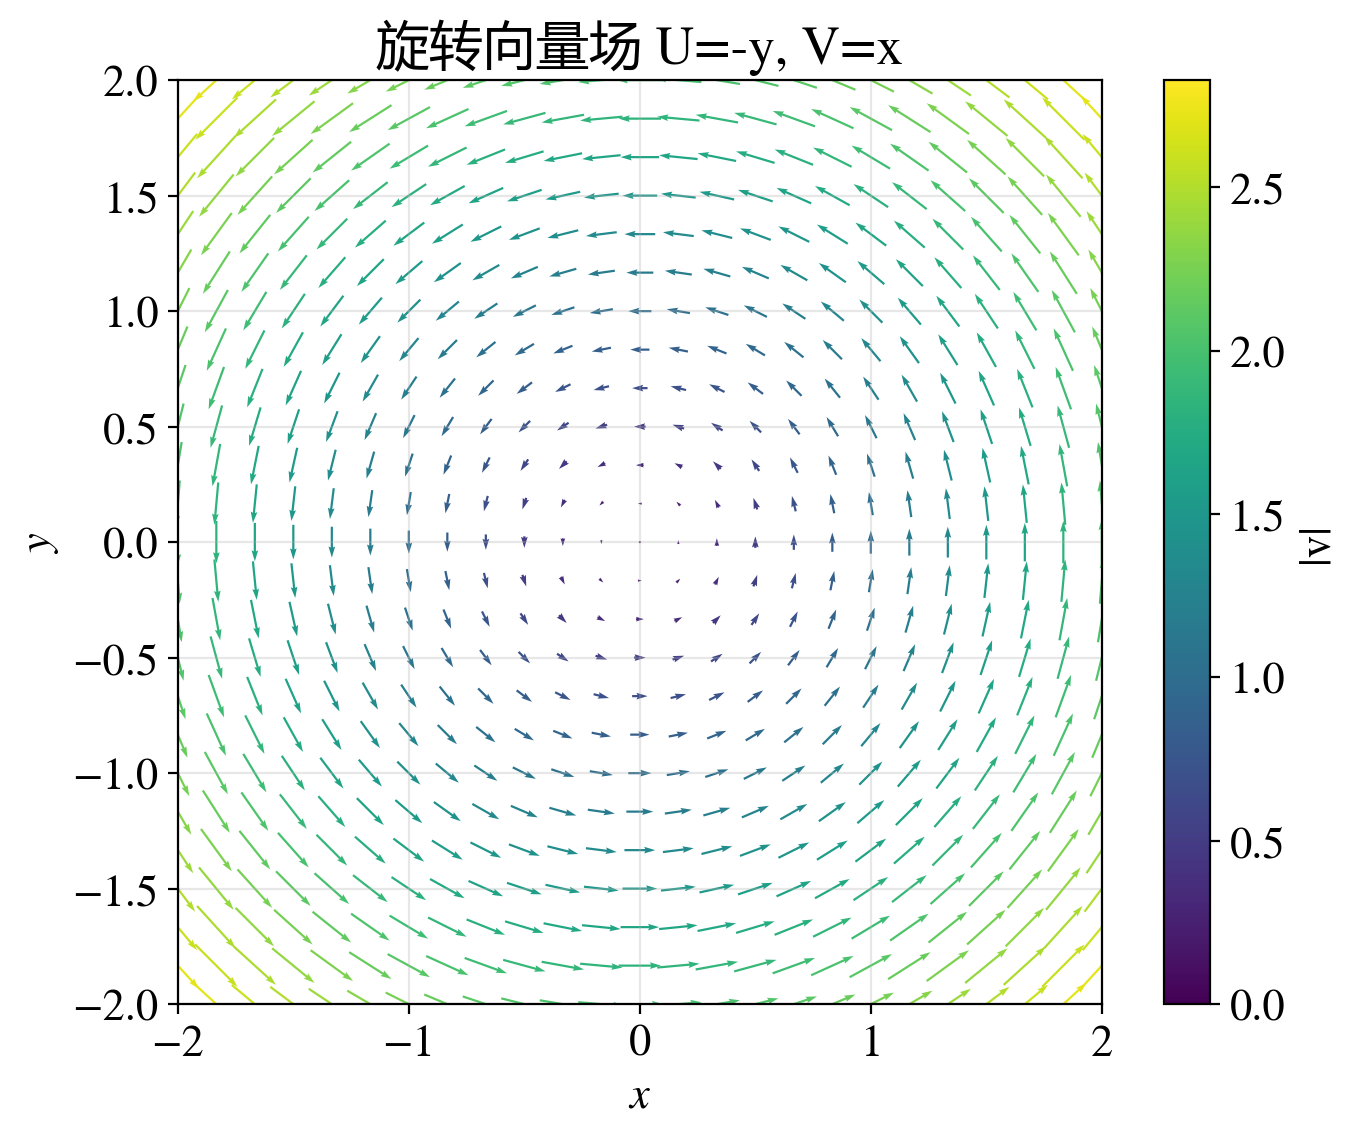

In [92]:

# 1) 生成网格
y, x = np.mgrid[-2:2:25j, -2:2:25j]   # 25×25 栅格

# 2) 定义一个简单的旋转场：U = -y, V = x
U, V = -y, x
speed = np.hypot(U, V)                # 向量模长，用于着色

# 3) 绘制 quiver
fig, ax = plt.subplots(figsize=(8, 6))
q = ax.quiver(x, y, U, V, speed, cmap="viridis",
              pivot="mid", angles="xy", scale_units="xy", scale=10)

# 4) 颜色条与图例箭头
fig.colorbar(q, ax=ax, label="|v|")
#ax.quiverkey(q, X=1., Y=1.05, U=1, label="长度=1", labelpos="E", coordinates="axes")

# 5) 轴设定
ax.set_aspect("equal", adjustable="box")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("旋转向量场 U=-y, V=x")
ax.grid(True, alpha=0.3)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

Y, X = np.mgrid[-2:2:20j, -2:2:20j]

U, V = -Y, X

ax.streamplot(X, Y, U, V, density=1., )

ax.set_aspect("equal", adjustable="box")

ax.set_title("流线 U=-y, V=x")

ax.grid(visible=True, which='major', color='lightgrey', linestyle='-')
ax.grid(visible=True, which='minor', color='lightgrey', linestyle=':')


## 饼图（Pie）
- 调用形式：`ax.pie(sizes, labels=..., autopct=..., startangle=..., explode=...)`
- 要点：  
  - 分类占比可视化；适度使用，避免种类过多导致难读。

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie([30, 25, 45], labels=['A','B','C'], autopct='%1.1f%%')

ax.set_aspect("equal", adjustable="box")


## 坐标轴控制与标注
- `ax.set_xlim/ylim`、
- `ax.set_xticks/xticklabels`
- `ax.grid`
- `ax.legend`
- `ax.annotate`


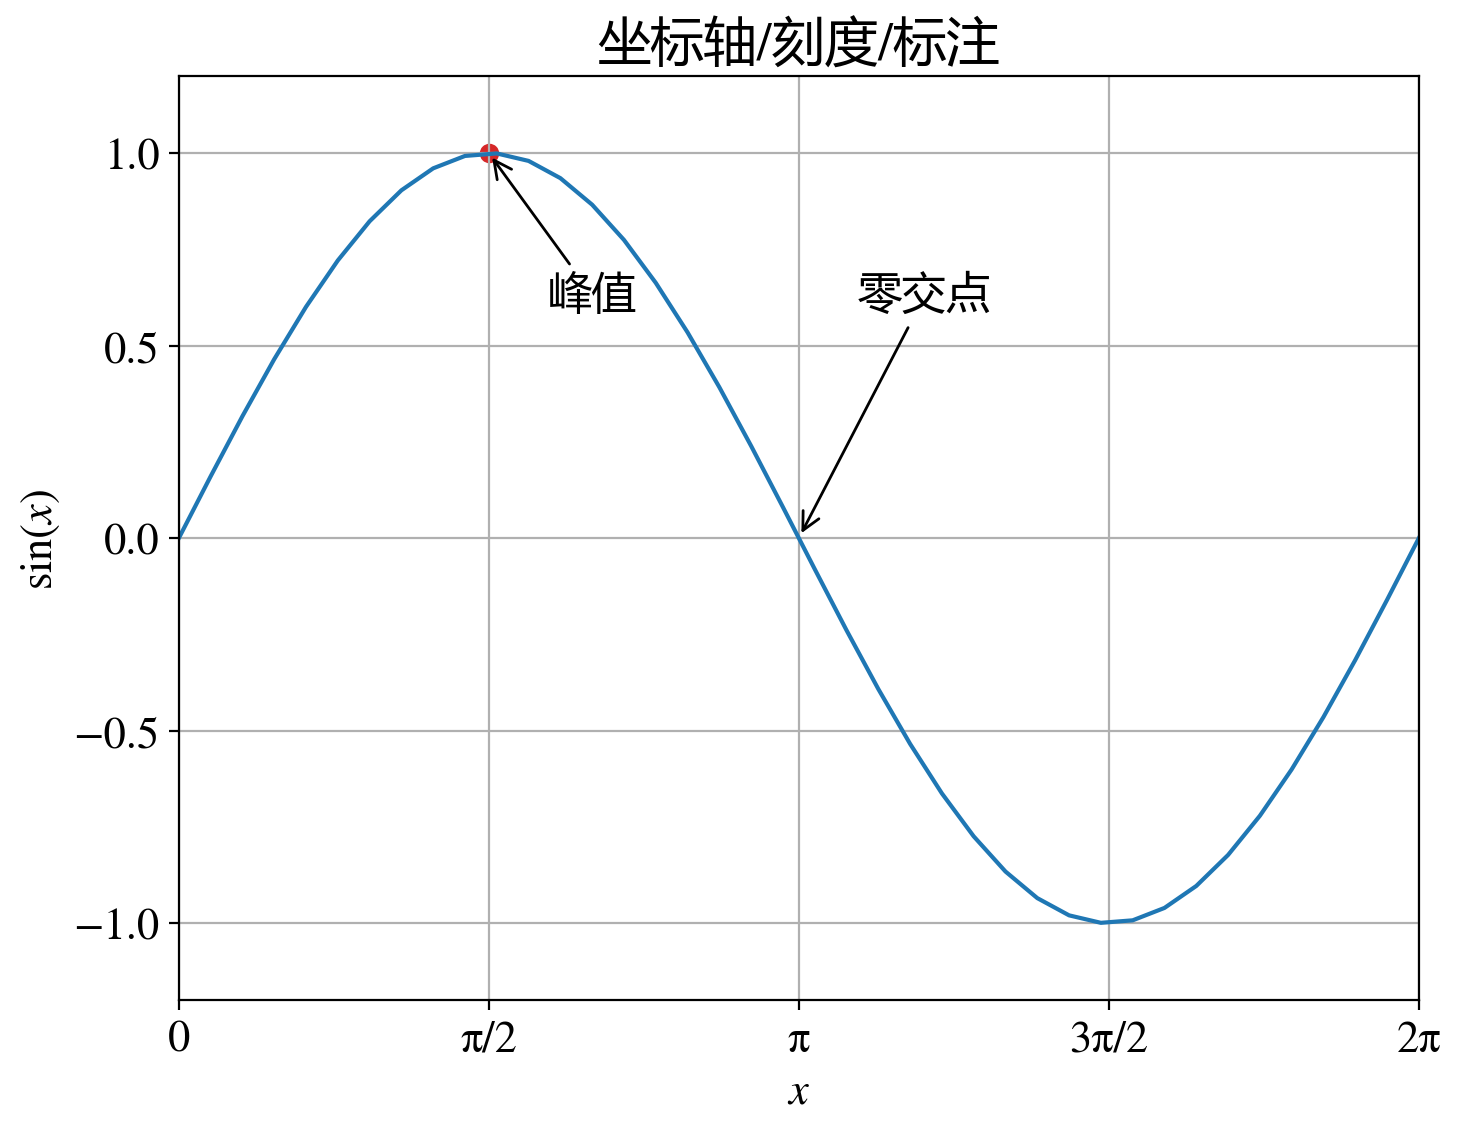

In [102]:
fig, ax = plt.subplots(figsize=(8, 6))

x = np.linspace(0, 2*np.pi, 40)

ax.plot(x, np.sin(x))

## x轴范围
ax.set_xlim(0, 2*np.pi)

## y轴范围
ax.set_ylim(-1.2, 1.2)

## x轴的刻度标记
ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
              ['0', 'π/2', 'π', '3π/2', '2π'])

ax.set_title("坐标轴/刻度/标注")
ax.set_xlabel("$x$")
ax.set_ylabel("sin($x$)")

# 添加注释
xm = np.pi/2
## 在该坐标点(xm, 1)添加散点
ax.scatter([xm],[1], color='tab:red')

## 添加标注 xy点为指向点，xytext为标注文字点
ax.annotate("峰值", xy=(xm,1), xytext=(xm+0.3,0.6),
            arrowprops=dict(arrowstyle="->"))
ax.annotate("零交点", xy=(np.pi,0), xytext=(np.pi+0.3,0.6),
            arrowprops=dict(arrowstyle="->"))
ax.grid(True)


## 保存与分辨率
- `plt.savefig("fig.png", dpi=300, bbox_inches='tight')`
- 支持矢量：`.pdf` / `.svg`（出版/课件首选）

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, np.sin(x))

ax.set_title("保存示例")

plt.savefig("lecture_demo.pdf", dpi=300, bbox_inches='tight')

plt.close(fig)

#print("已保存为 lecture_demo.pdf（矢量）")

### 课堂练习
1. 在上图中的 `x=π` `y=0`处添加注释箭头，说明“零交点”。  
2. 将图保存为 `my_plot.pdf` 并检查大小与清晰度。


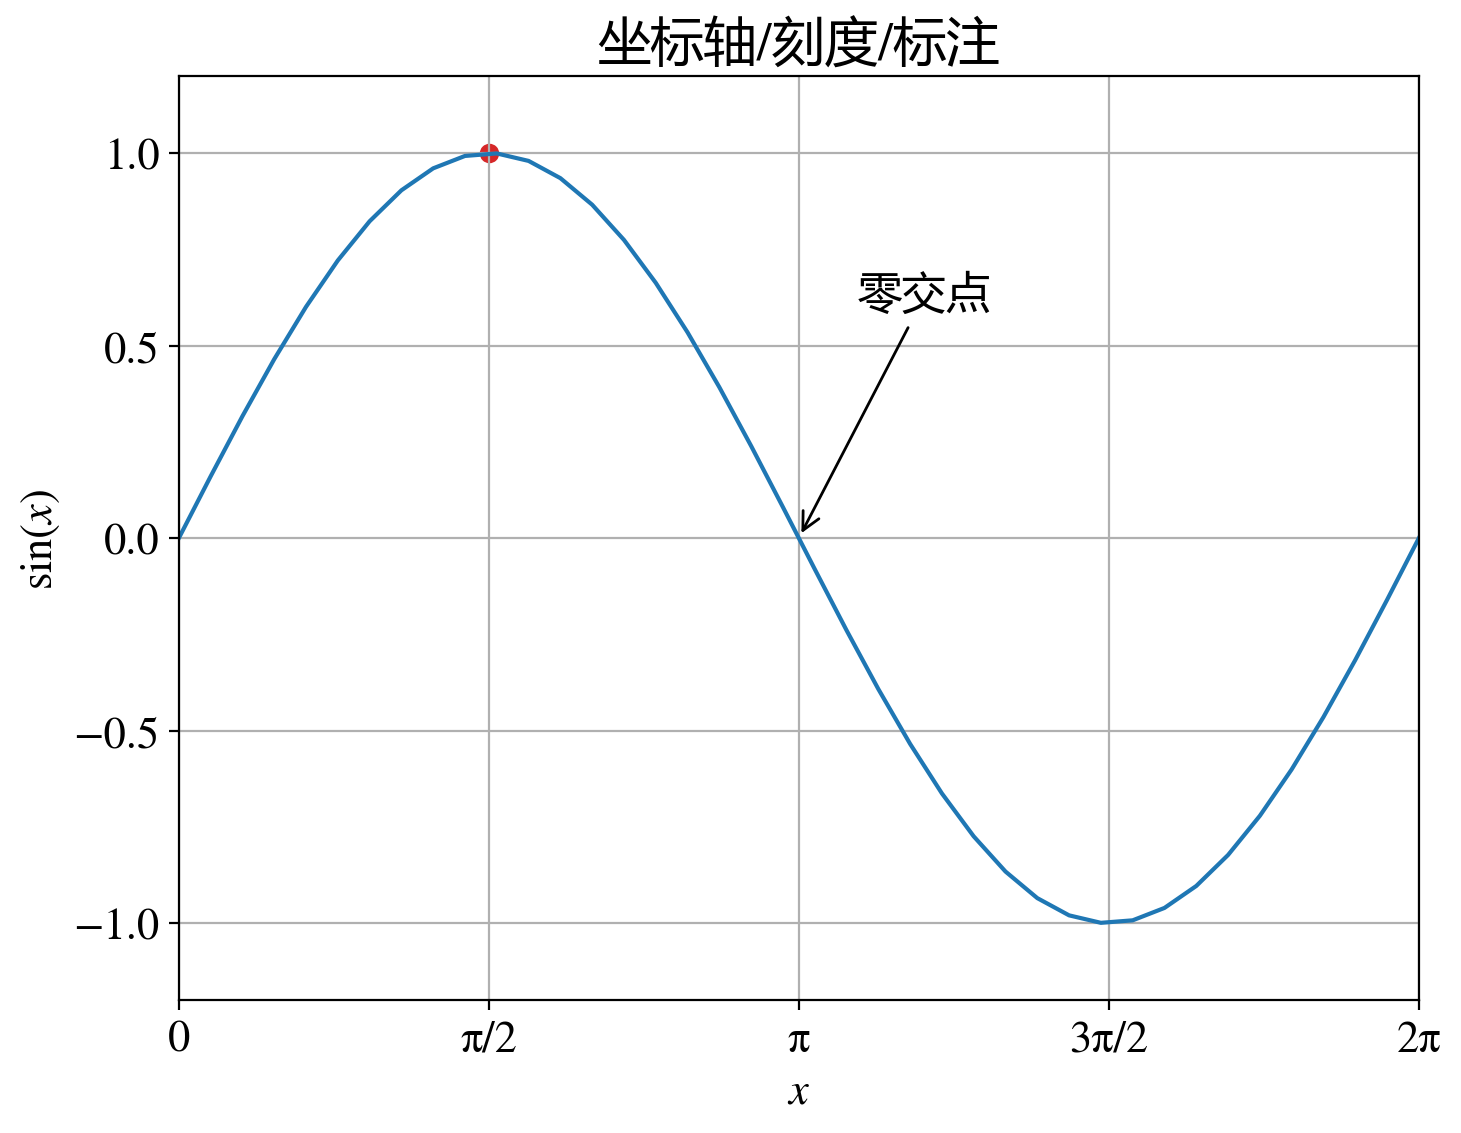

In [106]:
## 你的代码 
fig, ax = plt.subplots(figsize=(8, 6))

x = np.linspace(0, 2*np.pi, 40)

ax.plot(x, np.sin(x))

## x轴范围
ax.set_xlim(0, 2*np.pi)

## y轴范围
ax.set_ylim(-1.2, 1.2)

## x轴的刻度标记
ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
              ['0', 'π/2', 'π', '3π/2', '2π'])

ax.set_title("坐标轴/刻度/标注")
ax.set_xlabel("$x$")
ax.set_ylabel("sin($x$)")

# 添加注释
xm = np.pi/2
## 在该坐标点(xm, 1)添加散点
ax.scatter([xm],[1], color='tab:red')

## 添加标注 xy点为指向点，xytext为标注文字点
ax.annotate("零交点", xy=(np.pi,0), xytext=(np.pi+0.3,0.6),
            arrowprops=dict(arrowstyle="->"))
ax.grid(True)
fig, ax = plt.subplots()

ax.plot(x, np.sin(x))

ax.set_title("保存示例")

plt.savefig("my_plot.pdf", dpi=300, bbox_inches='tight')

plt.close(fig)


## 对数坐标与双坐标轴
- 对数：`ax.set_xscale('log')` / `ax.set_yscale('log')`
- 双轴：`ax2 = ax.twinx()`


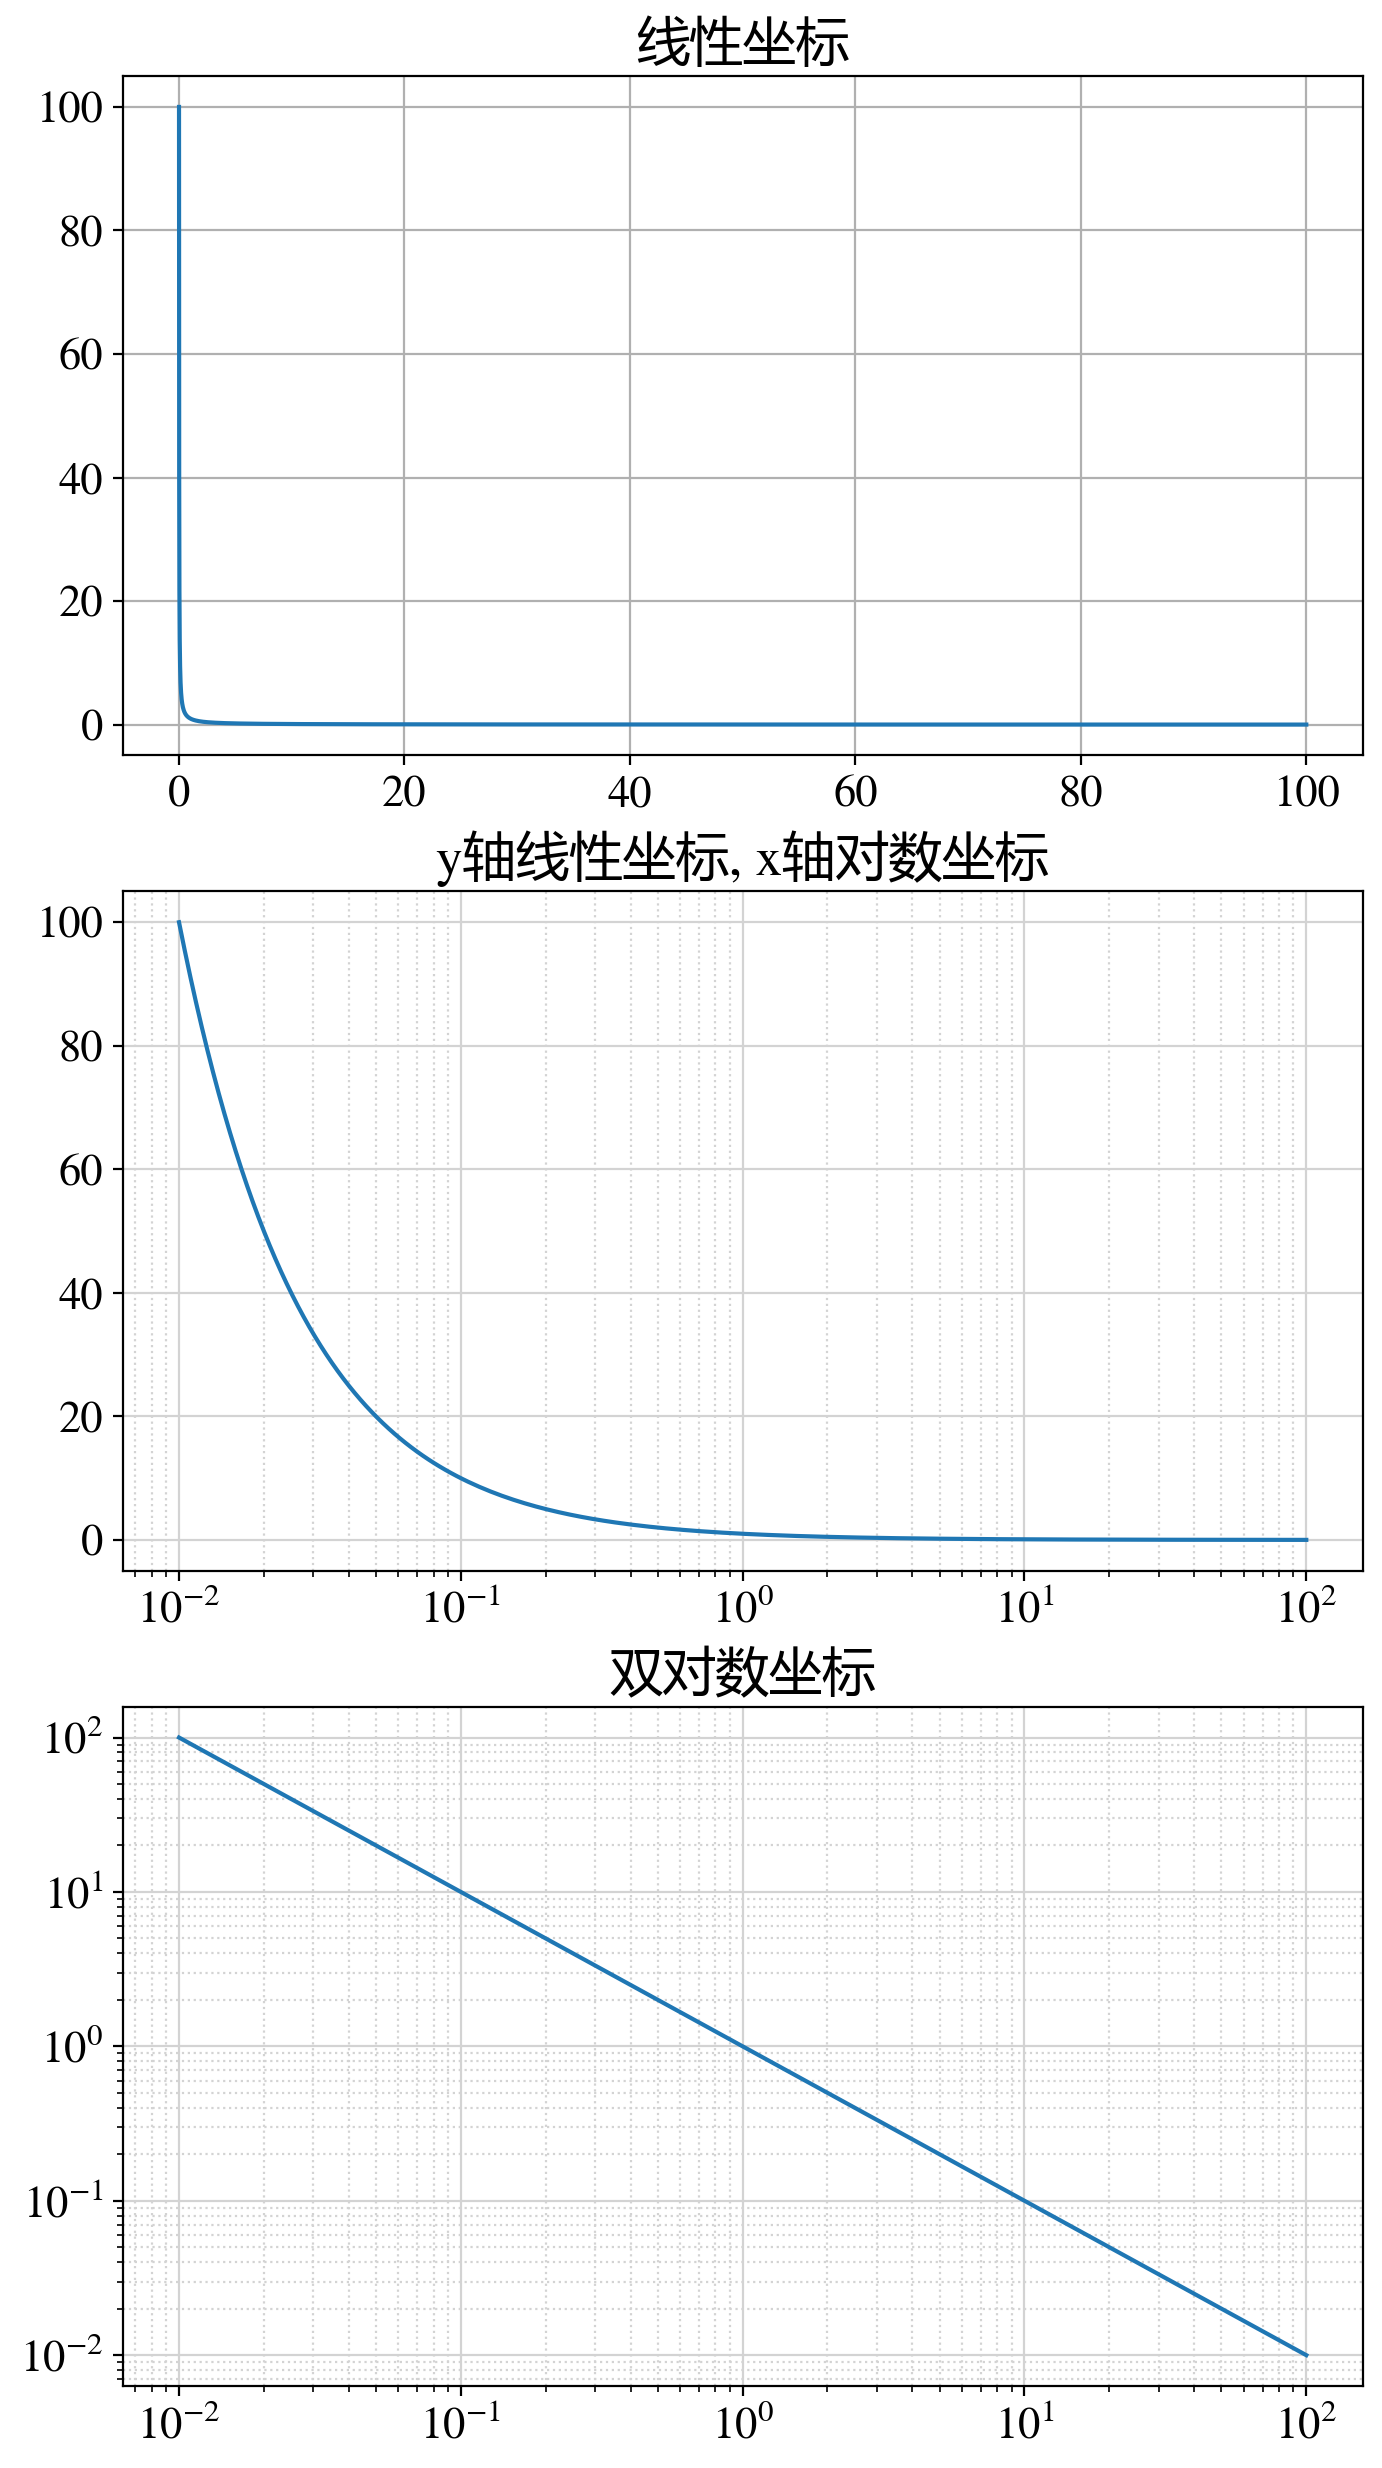

In [108]:
# 对数坐标

xx = np.logspace(-2, 2, 200)

fig, ax = plt.subplots(3,1, figsize=(8, 15))

ax[0].plot(xx, 1/xx, label='1/x')
ax[0].set_title("线性坐标")
ax[0].grid()
#plt.grid(visible=True, which='major', color='lightgrey', linestyle='-')
#plt.grid(visible=True, which='minor', color='lightgrey', linestyle=':')

ax[1].plot(xx, 1/xx, label='1/x')
ax[1].set_xscale('log')
ax[1].set_title("y轴线性坐标, x轴对数坐标")
ax[1].grid(visible=True, which='major', color='lightgrey', linestyle='-')
ax[1].grid(visible=True, which='minor', color='lightgrey', linestyle=':')

ax[2].plot(xx, 1/xx, label='1/x')
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_title("双对数坐标")
#ax[2].grid()
ax[2].grid(visible=True, which='major', color='lightgrey', linestyle='-')
ax[2].grid(visible=True, which='minor', color='lightgrey', linestyle=':')

#ax.legend()
plt.show()


In [ ]:
## 画横线或者竖线

fig, ax = plt.subplots(figsize=(8, 6))

ax.vlines( 0.5, ymin = -1, ymax = 1, label = '纵线')
ax.hlines( 0, xmin = -1, xmax = 1, linestyle='dashed', label = '横线')

ax.legend(loc='best')


### 课堂练习

- 在上面的对数图中，画出 `x=0.2`, `x=2`, `x=20` 的纵线
- 在对数图中标出点 (x=20, y=20)
- 

In [ ]:
## 你的代码


# 样式主题、双坐标轴、3D、动画、交互与出版级输出

## 样式与主题（styles）
- 内置样式：`plt.style.available`
- 使用：`plt.style.use('seaborn-v0_8')` 或 `with plt.style.context('ggplot'): ...`


In [ ]:
#plt.style.available[:10]  # 查看可用样式名（截取前 10 个）


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 造数据
x = np.arange(0, 24)                    # 小时
temp = 10 + 8*np.sin((x-6)/24*2*np.pi)  # 摄氏温度
rh   = 60 + 25*np.cos((x-10)/24*2*np.pi) # 相对湿度%

fig, ax1 = plt.subplots(figsize=(8, 6))

# 左轴：温度
color1 = 'tab:red'
lns1 = ax1.plot(x, temp, color=color1, marker='o', label='温度 (°C)')
ax1.set_xlabel('小时')
ax1.set_ylabel('温度 (°C)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, ls='--', alpha=0.3)

# 右轴：湿度（创建共享 x 的新 y 轴）
ax2 = ax1.twinx()
color2 = 'tab:blue'
lns2 = ax2.plot(x, rh, color=color2, marker='s', label='相对湿度 (%)')
ax2.set_ylabel('相对湿度 (%)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# 合并图例（从两个轴分别拿到 Line2D）
lines = lns1 + lns2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

#plt.title('Dual Y-Axis with ax.twinx()')
plt.tight_layout()


In [ ]:
# 双坐标轴

t = np.linspace(0, 10, 200)
y1 = np.exp(-t/3.0)     # 衰减
y2 = np.sin(2*np.pi*t)  # 正弦

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

ax1.plot(t, y1, label='exp decay')
ax2.plot(t, y2, color='tab:orange', label='sin', alpha=0.7)

ax1.set_xlabel("$t$")
ax1.set_ylabel("Amplitude (decay)")

ax2.set_ylabel("Amplitude (sin)")
ax1.set_title("双坐标轴示例")

fig.tight_layout(); plt.show()


### 课堂练习
把下面图中的直方图和累积直方图画成双纵坐标
- 左轴y轴是直方图的密度函数
- 右边y轴是累积直方图(非密度函数)

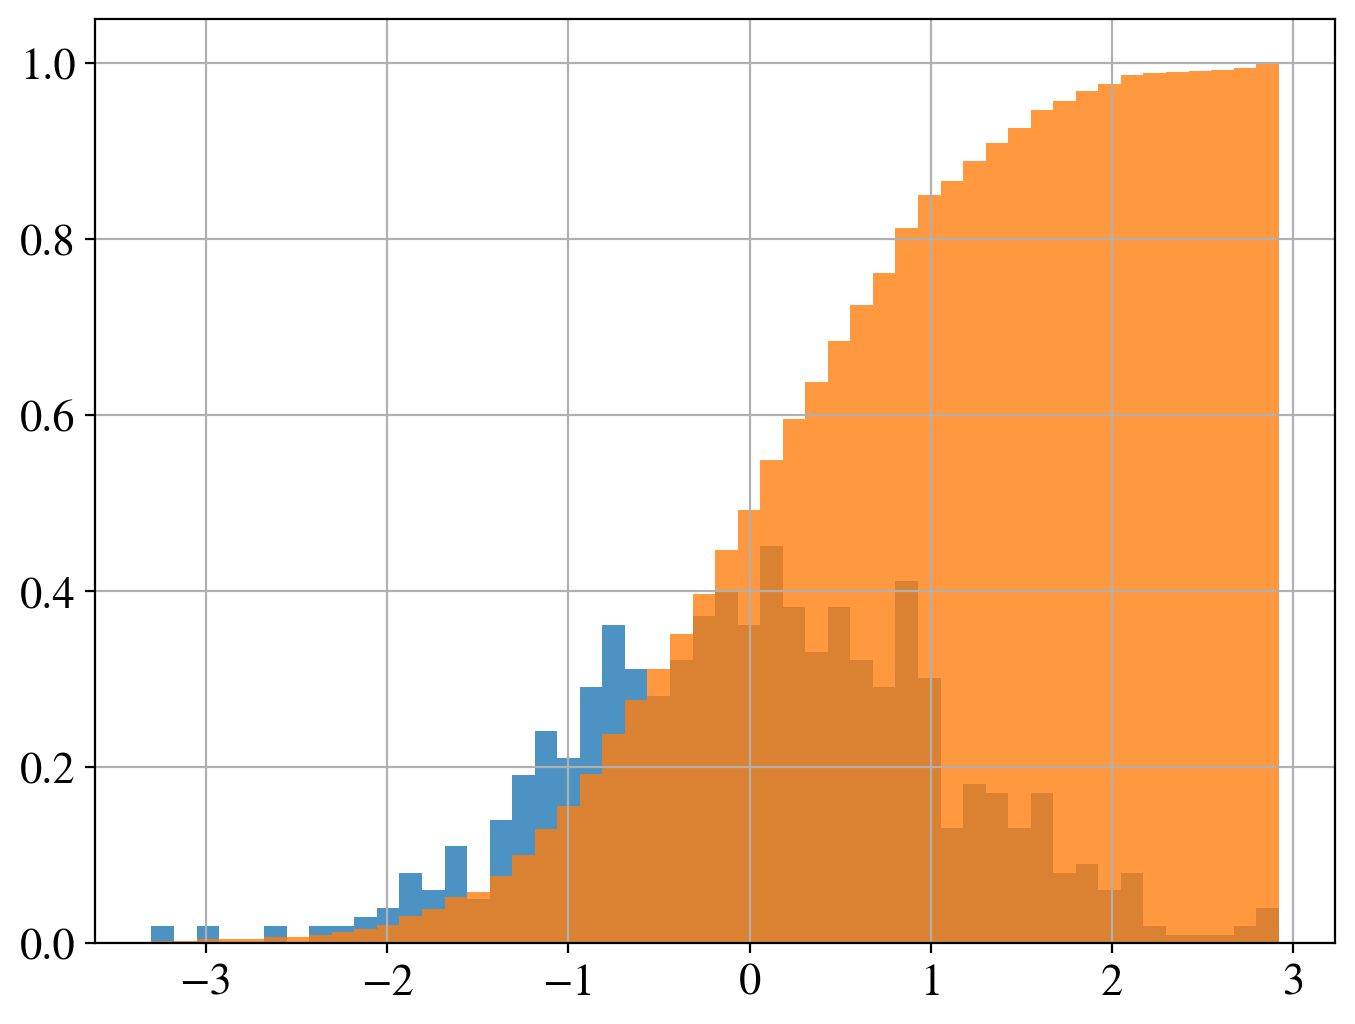

In [110]:
fig, ax = plt.subplots(figsize=(8, 6))

data = np.random.normal(0, 1, 800)
ax.hist(data, bins=50, density=True, alpha=0.8)
ax.hist(data, bins=50, density=True, alpha=0.8, cumulative=True)

ax.grid()

## 3D 绘图（mplot3d）


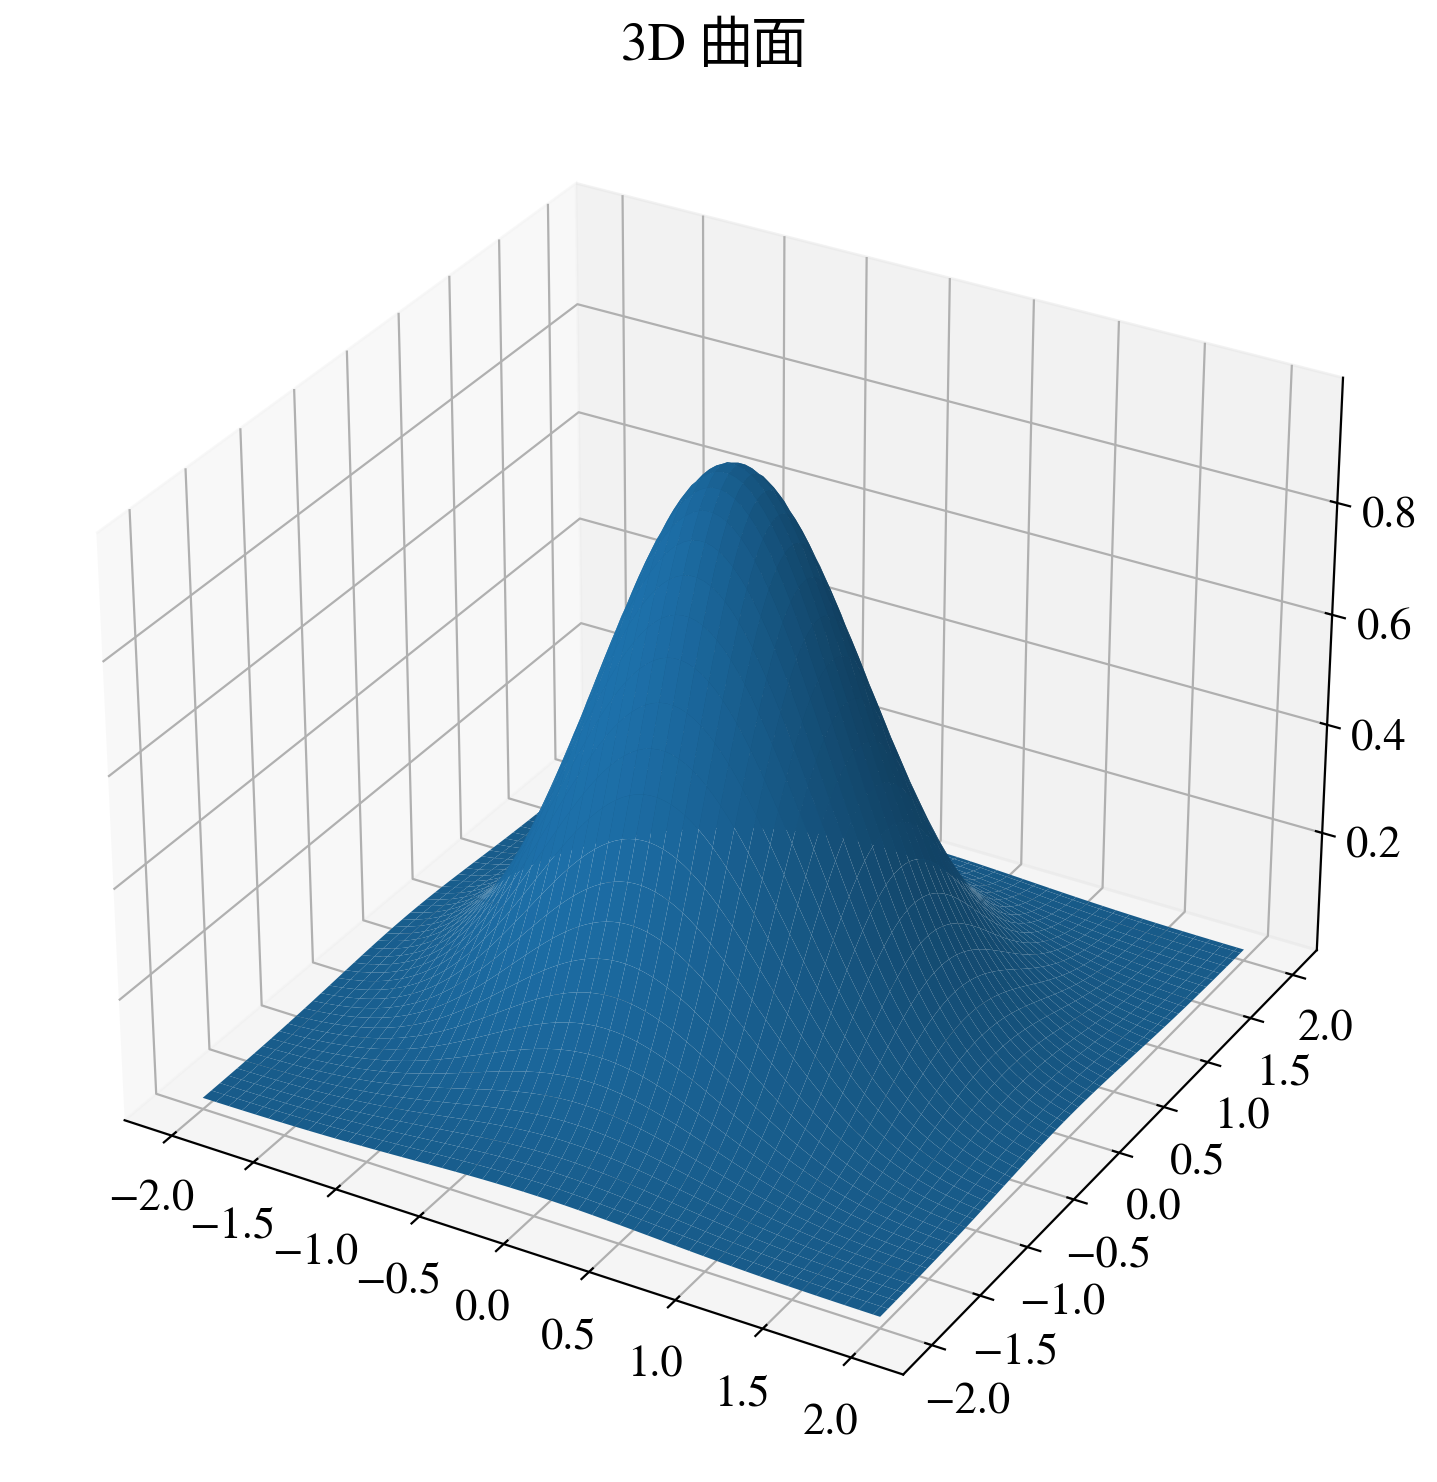

In [112]:
from mpl_toolkits.mplot3d import Axes3D  # 触发 3D 支持（现代版本常可省略）

X, Y = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
Z = np.exp(-(X**2 + Y**2))

fig = plt.figure(figsize=(9, 9))

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True)

ax.set_title("3D 曲面")

plt.show()


## 动画（FuncAnimation）
- Jupyter 内联显示已在第 0 节设置：`mpl.rcParams['animation.html'] = 'jshtml'`


In [120]:
mpl.rcParams['animation.html'] = 'jshtml'

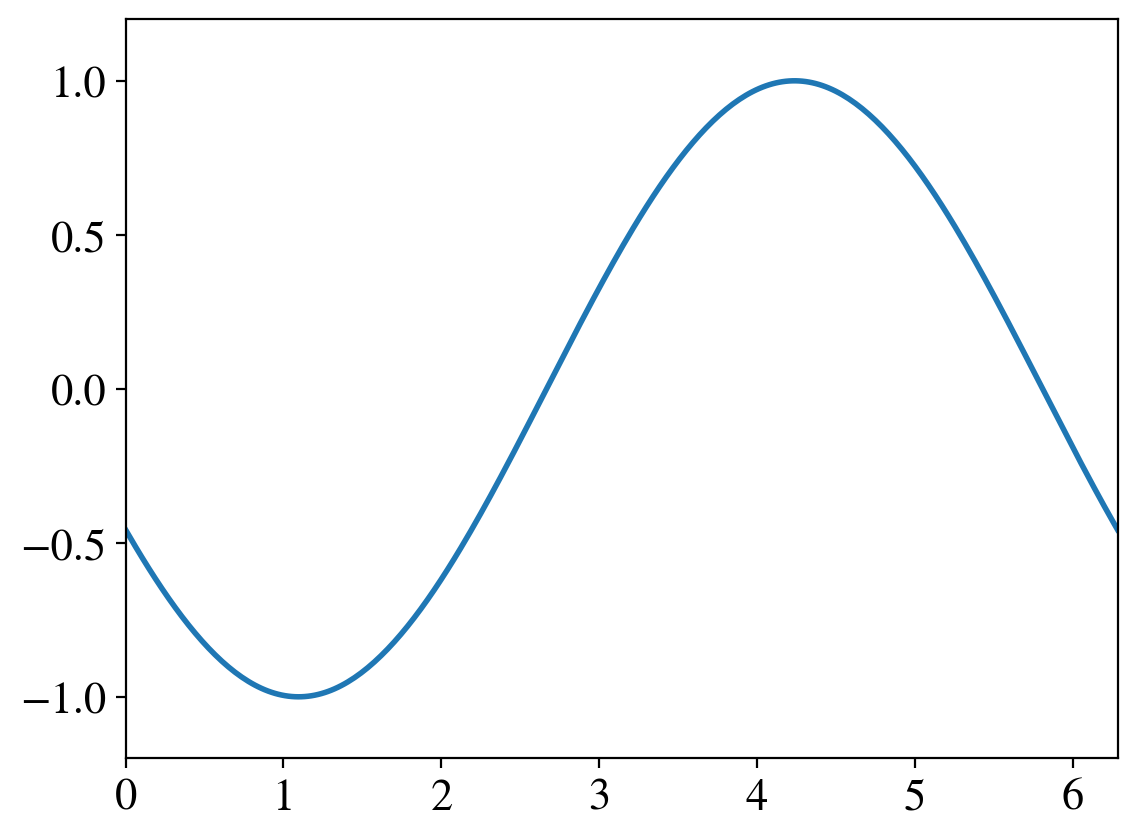

In [122]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
ax.set_xlim(0, 2*np.pi); ax.set_ylim(-1.2, 1.2)
(line,) = ax.plot([], [], lw=2)

xdata = np.linspace(0, 2*np.pi, 300)

def init():
    line.set_data([], [])
    return (line,)

def update(frame):
    y = np.sin(xdata + 0.1*frame)
    line.set_data(xdata, y)
    return (line,)

ani = FuncAnimation(fig, update, frames=100, init_func=init, blit=True, interval=30)
ani  # 在 Jupyter 显示动画


# 多图布局、统计图、等高线与图像、时间序列

## 子图布局：subplots 与 GridSpec


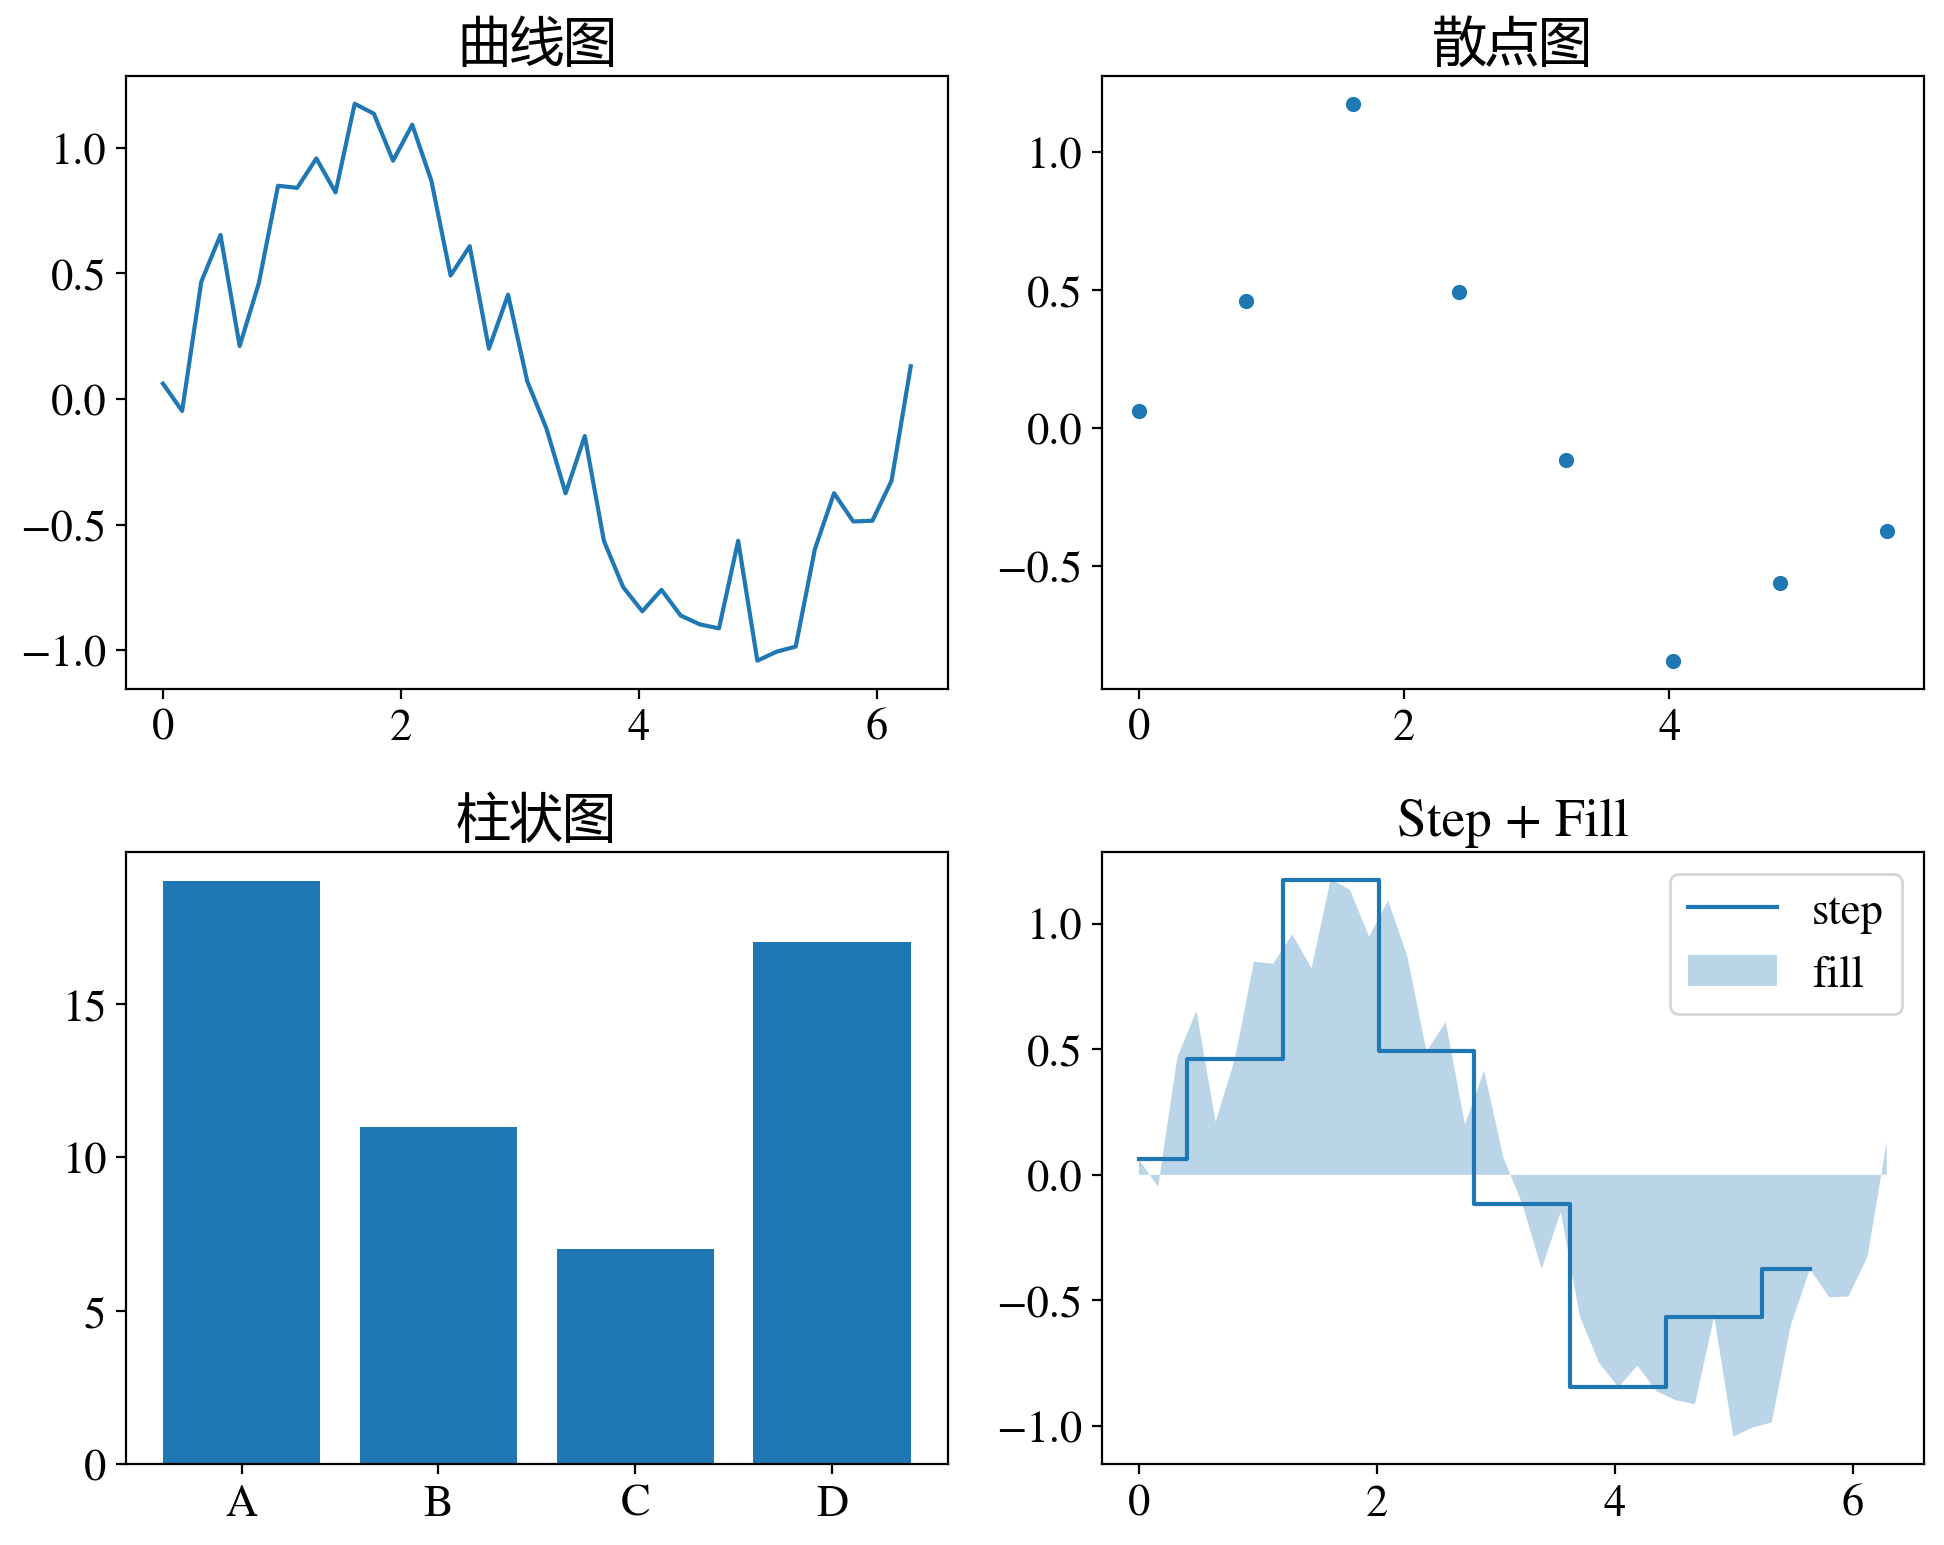

In [124]:
rng = np.random.default_rng(42)
y = np.sin(x) + 0.2*rng.standard_normal(x.size)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.ravel()

# 线
axs[0].plot(x, y); axs[0].set_title("曲线图")

# 散点
axs[1].scatter(x[::5], y[::5], s=20); axs[1].set_title("散点图")

# 条形
cats = ["A","B","C","D"]
vals = rng.integers(5, 20, size=4)
axs[2].bar(cats, vals); axs[2].set_title("柱状图")

# 填充与阶梯
axs[3].step(x[::5], y[::5], where='mid', label='step')
axs[3].fill_between(x, 0, y, alpha=0.3, label='fill')
axs[3].legend(); axs[3].set_title("Step + Fill")
plt.tight_layout()
plt.show()


In [ ]:
data = rng.normal(loc=0.0, scale=1.0, size=300)
bins = np.linspace(-3, 3, 25)

fig, axs = plt.subplots(2,2, figsize=(10,6))

# 误差条
x_s = np.arange(6)
y_s = rng.normal(0, 1, size=6)
y_err = 0.3 + 0.3*np.abs(rng.normal(size=6))
axs[0,0].errorbar(x_s, y_s, yerr=y_err, fmt='o-')
axs[0,0].set_title("误差条")

# 直方图
axs[0,1].hist(data, bins=bins, density=True, alpha=0.6)
axs[0,1].set_title("直方图（归一化）")

# 箱线图
groupA = rng.normal(0,1,150)
groupB = rng.normal(0.5,0.8,150)
axs[1,0].boxplot([groupA, groupB], tick_labels=['A','B'])
axs[1,0].set_title("箱线图")

# 简单核密度估计（演示版）
from scipy.stats import gaussian_kde
kde = gaussian_kde(data)
xx = np.linspace(-3,3,200)
axs[1,1].hist(data, bins=bins, density=True, alpha=0.3)
axs[1,1].plot(xx, kde(xx))
axs[1,1].set_title("KDE + 直方图")
plt.tight_layout()
plt.show()


## 时间序列

In [ ]:
import datetime as dt

# 生成日期索引
start = dt.date(2025, 1, 1)
dates = np.array([start + dt.timedelta(days=i) for i in range(60)])
vals  = 10 + 2*np.sin(np.linspace(0, 4*np.pi, len(dates))) + rng.normal(0,0.8,len(dates))

fig, ax = plt.subplots(figsize=(8,3))
ax.plot(dates, vals, marker='o', ms=3)
ax.set_title("时间序列示例")
fig.autofmt_xdate()  # 旋转日期刻度
plt.show()
